# **Group-7 : Machine Learning Project**

**Title: News Cognizer**

**Team Members:**

*Ajay Reddy Kudumula - 11580520, AjayReddyKudumula@my.unt.edu*

*Deeraj Thakkilapa - 11660444, deerajthakkilapati@my.unt.edu*

*Naga Venkata Kanakalakshmi - 11725119, nagavenkatakanakalmurikipudi@my.unt.edu*

*Sai Charan Reddy Bushireddy - 11642757, saicharanreddybushireddy@my.unt.edu*

**Import all the requried Libraries to implement the News Cognizer (A Custom News Classifier)**

In [2]:
#Data Manipulation
import pandas as pds_g7
import numpy as npy_g7

#Data visualization Libraries
import seaborn as sns_g7
import matplotlib.pyplot as mplt_g7

#Data Pre-Processing Libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

#Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Training and Testing data
from sklearn.model_selection import train_test_split

#Performance Metrics
from sklearn.metrics import accuracy_score as accuracy_g7, precision_score as precision_g7, recall_score as recall_g7, f1_score as f1_score_g7

#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold

#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

#SVM Classifier
from sklearn.svm import SVC as svc_classifier

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import make_scorer as make_scorer_g7

#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

**Load the News Dataset and Display it**

In [3]:
# Creating the dataframe for news cognizer dataset
news_cognizer_data_frame = pds_g7.read_csv("/Users/dheerajchowdary/Desktop/ml proj/combined_dataframe (1).csv")

#Dipslay the top 10 records of the dataset
print("The top 10 records of the News Cognizer DataFrame is :")
news_cognizer_data_frame.head(10)

The top 10 records of the News Cognizer DataFrame is :


,News,the,to,ect,and,for,of,a,you,hou,...,infrastructure,military,allowing,ff,dry,author,Published,title.1,country.1,prediction
0,News 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,US,0
1,News 2,8,13,24,6,6,2,102,1,27,...,0,0,0,1,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,US,0
2,News 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,US,0
3,News 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,US,0
4,News 5,7,6,17,1,5,2,57,0,9,...,0,0,0,1,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,US,0
5,News 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Hillary Goes Absolutely Berserk On Protester A...,US,0
6,News 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,US,0
7,News 8,0,2,2,3,1,2,21,6,0,...,0,0,0,1,0,Fed Up,2016-11-05T01:19:00.000+02:00,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,US,0
8,News 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,Fed Up,2016-11-06T23:54:00.000+02:00,BREAKING: CLINTON CLEARED...Was This A Coordin...,US,0
9,News 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,Fed Up,2016-11-07T02:43:00.000+02:00,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",US,0


In [4]:
#Display the shape of the new cognizer dataframe
print("The shape of the DataFrame is : ",news_cognizer_data_frame.shape)

The shape of the DataFrame is :  (5172, 3006)


In [5]:
#Display the Features and the Target Data of news cognizer
print("Features:", news_cognizer_data_frame.columns)

print("\nTarget_Labels:", news_cognizer_data_frame['prediction'].unique())

Features: Index(['News', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'infrastructure', 'military', 'allowing', 'ff', 'dry', 'author',
       'Published', 'title.1', 'country.1', 'prediction'],
      dtype='object', length=3006)

Target_Labels: [0 2 3 1 5 6 4]


In [6]:
#Rename predication data with target_data
news_cognizer_data_frame.rename(columns={'prediction': 'target_data'}, inplace=True)

print("Features:", news_cognizer_data_frame.columns)
print("\nTarget_Labels:", news_cognizer_data_frame['target_data'].unique())

Features: Index(['News', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'infrastructure', 'military', 'allowing', 'ff', 'dry', 'author',
       'Published', 'title.1', 'country.1', 'target_data'],
      dtype='object', length=3006)

Target_Labels: [0 2 3 1 5 6 4]


# Exploratory Data Analysis

**Distribution of News Cognizer Dataset**

In [7]:
#Count the News Categories
news_categories_count = news_cognizer_data_frame['target_data'].value_counts()
print(news_categories_count)

target_data
1    4262
2     325
4     146
0     141
5     124
6     100
3      74
Name: count, dtype: int64


In [8]:
# map the target data and compute the count of each category
news_categories_data = news_cognizer_data_frame['target_data']

# mapping lables with new categories
news_categories_mapping = {
    0: 'Bias',
    1: 'BS',
    2: 'Conspiracy',
    3: 'Fake',
    4: 'Hate',
    5: 'Junk Science',
    6: 'Satire'
}

# replace numeric values with news categories
named_news_categories = news_categories_data.map(news_categories_mapping)

# count the occurrences of each news category
news_categories_count = named_news_categories.value_counts()

**visualize the target data using piechart**

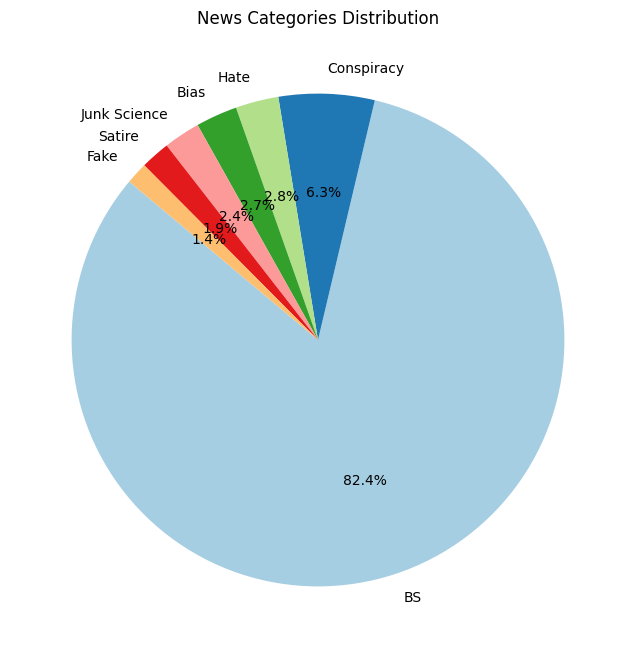

In [9]:
#visualize the target data using piechart

# Calculate percentages
category_percentages = (news_categories_count / news_categories_count.sum()) * 100

# Visualize the distribution using a pie chart with percentage labels
mplt_g7.figure(figsize=(8, 8))
mplt_g7.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', startangle=140, colors=mplt_g7.cm.Paired.colors)
mplt_g7.title('News Categories Distribution')
mplt_g7.show()


**visualize the target data using Bar Chart**

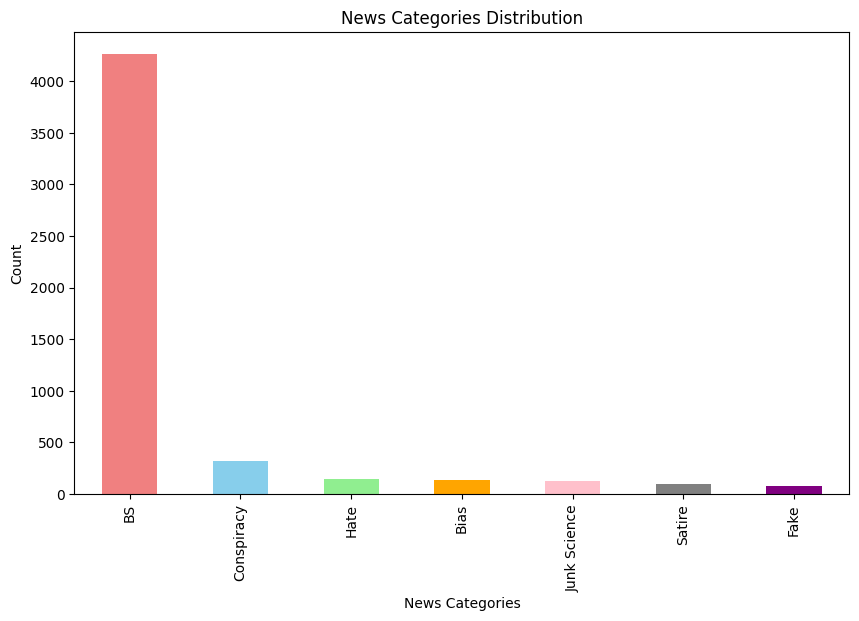

In [40]:
# visaulize the data using bar plot

custom_colors = ['lightcoral', 'skyblue', 'lightgreen', 'orange', 'pink', 'gray', 'purple']

mplt_g7.figure(figsize=(10, 6))
news_categories_count.plot(kind='bar', color=custom_colors)
mplt_g7.title('News Categories Distribution')
mplt_g7.xlabel('News Categories')
mplt_g7.ylabel('Count')
mplt_g7.show()

In [11]:
########## visualize Features data...to..do..

# Data Pre-Processing

**Ordinal Encoding**

In [12]:
#Implement the ordinal encoding expect on 1st and last columns.
#The First column contains the Input value and last column contains the target_data.

first_column = news_cognizer_data_frame.iloc[:, 0]
remaining_columns = news_cognizer_data_frame.iloc[:, 1:-1]


In [13]:
# perform ordinal encoding on news cognizer dataframe

ordinal_encoder_instance = OrdinalEncoder().set_output(transform="pandas")
encoded_columns = ordinal_encoder_instance.fit_transform(remaining_columns)
encoded_news_cognizer = pds_g7.concat([first_column, encoded_columns], axis=1)

encoded_news_cognizer.head(10)

,News,the,to,ect,and,for,of,a,you,hou,...,lay,infrastructure,military,allowing,ff,dry,author,Published,title.1,country.1
0,News 1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,145.0,163.0,2501.0,15.0
1,News 2,8.0,13.0,23.0,6.0,6.0,2.0,102.0,1.0,27.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1140.0,1667.0,3125.0,15.0
2,News 3,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,145.0,2049.0,476.0,15.0
3,News 4,0.0,5.0,21.0,0.0,5.0,1.0,51.0,2.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,365.0,2375.0,2850.0,15.0
4,News 5,7.0,6.0,16.0,1.0,5.0,2.0,57.0,0.0,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,365.0,2518.0,1413.0,15.0
5,News 6,4.0,5.0,0.0,4.0,2.0,3.0,45.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,145.0,2716.0,1785.0,15.0
6,News 7,5.0,3.0,0.0,3.0,2.0,1.0,37.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,365.0,3187.0,424.0,15.0
7,News 8,0.0,2.0,1.0,3.0,1.0,2.0,21.0,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,365.0,3230.0,4234.0,15.0
8,News 9,2.0,2.0,2.0,0.0,0.0,1.0,18.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,365.0,3397.0,433.0,15.0
9,News 10,4.0,4.0,34.0,0.0,1.0,0.0,49.0,1.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,365.0,3410.0,1324.0,15.0


**Handling Null Values**

In [14]:
# Count NaN values in each column
nan_counts = encoded_news_cognizer.isnull().sum()

# Print the nan counts of each column
print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
News           0
the            0
to             0
ect            0
and            0
            ... 
dry            0
author       687
Published      0
title.1      386
country.1      0
Length: 3005, dtype: int64


In [15]:
#Impute the mean value which has null/nan values which leads to better performance

#columns to impute
columns_to_impute = encoded_news_cognizer.iloc[:, 1:-1]

# Create a SimpleImputer instance
imputer_instance = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well
imputed_columns = pds_g7.DataFrame(imputer_instance.fit_transform(columns_to_impute), columns=columns_to_impute.columns)

# Concatenate the first column with the imputed columns
imputed_news_cognizer_df = pds_g7.concat([first_column, imputed_columns], axis=1)
print(imputed_news_cognizer_df)


           News   the    to   ect  and  for   of      a  you   hou  ...  \
0        News 1   0.0   0.0   0.0  0.0  0.0  0.0    2.0  0.0   0.0  ...   
1        News 2   8.0  13.0  23.0  6.0  6.0  2.0  102.0  1.0  27.0  ...   
2        News 3   0.0   0.0   0.0  0.0  0.0  0.0    8.0  0.0   0.0  ...   
3        News 4   0.0   5.0  21.0  0.0  5.0  1.0   51.0  2.0  10.0  ...   
4        News 5   7.0   6.0  16.0  1.0  5.0  2.0   57.0  0.0   9.0  ...   
...         ...   ...   ...   ...  ...  ...  ...    ...  ...   ...  ...   
5167  News 5168   2.0   2.0   1.0  3.0  0.0  0.0   32.0  0.0   0.0  ...   
5168  News 5169  35.0  27.0  10.0  2.0  6.0  5.0  151.0  4.0   3.0  ...   
5169  News 5170   0.0   0.0   0.0  1.0  0.0  0.0   11.0  0.0   0.0  ...   
5170  News 5171   2.0   7.0   0.0  0.0  2.0  1.0   28.0  2.0   0.0  ...   
5171  News 5172  22.0  24.0   4.0  1.0  6.0  5.0  148.0  8.0   2.0  ...   

      valued  lay  infrastructure  military  allowing   ff  dry  author  \
0        0.0  0.0       

In [16]:
# Count NaN values in each column after Imputation
nan_counts_after_imputation = imputed_news_cognizer_df.isnull().sum()

# Print the nan value counts after Imputation
print("NaN counts in each column after Impuatation:")
print(nan_counts_after_imputation)

NaN counts in each column after Impuatation:
News         0
the          0
to           0
ect          0
and          0
            ..
ff           0
dry          0
author       0
Published    0
title.1      0
Length: 3004, dtype: int64


# Scaling

In [17]:
# columns with numeric and float values
columns_data = imputed_news_cognizer_df.select_dtypes(include=['number', 'float']).columns

**Display the Data Before Scaling**

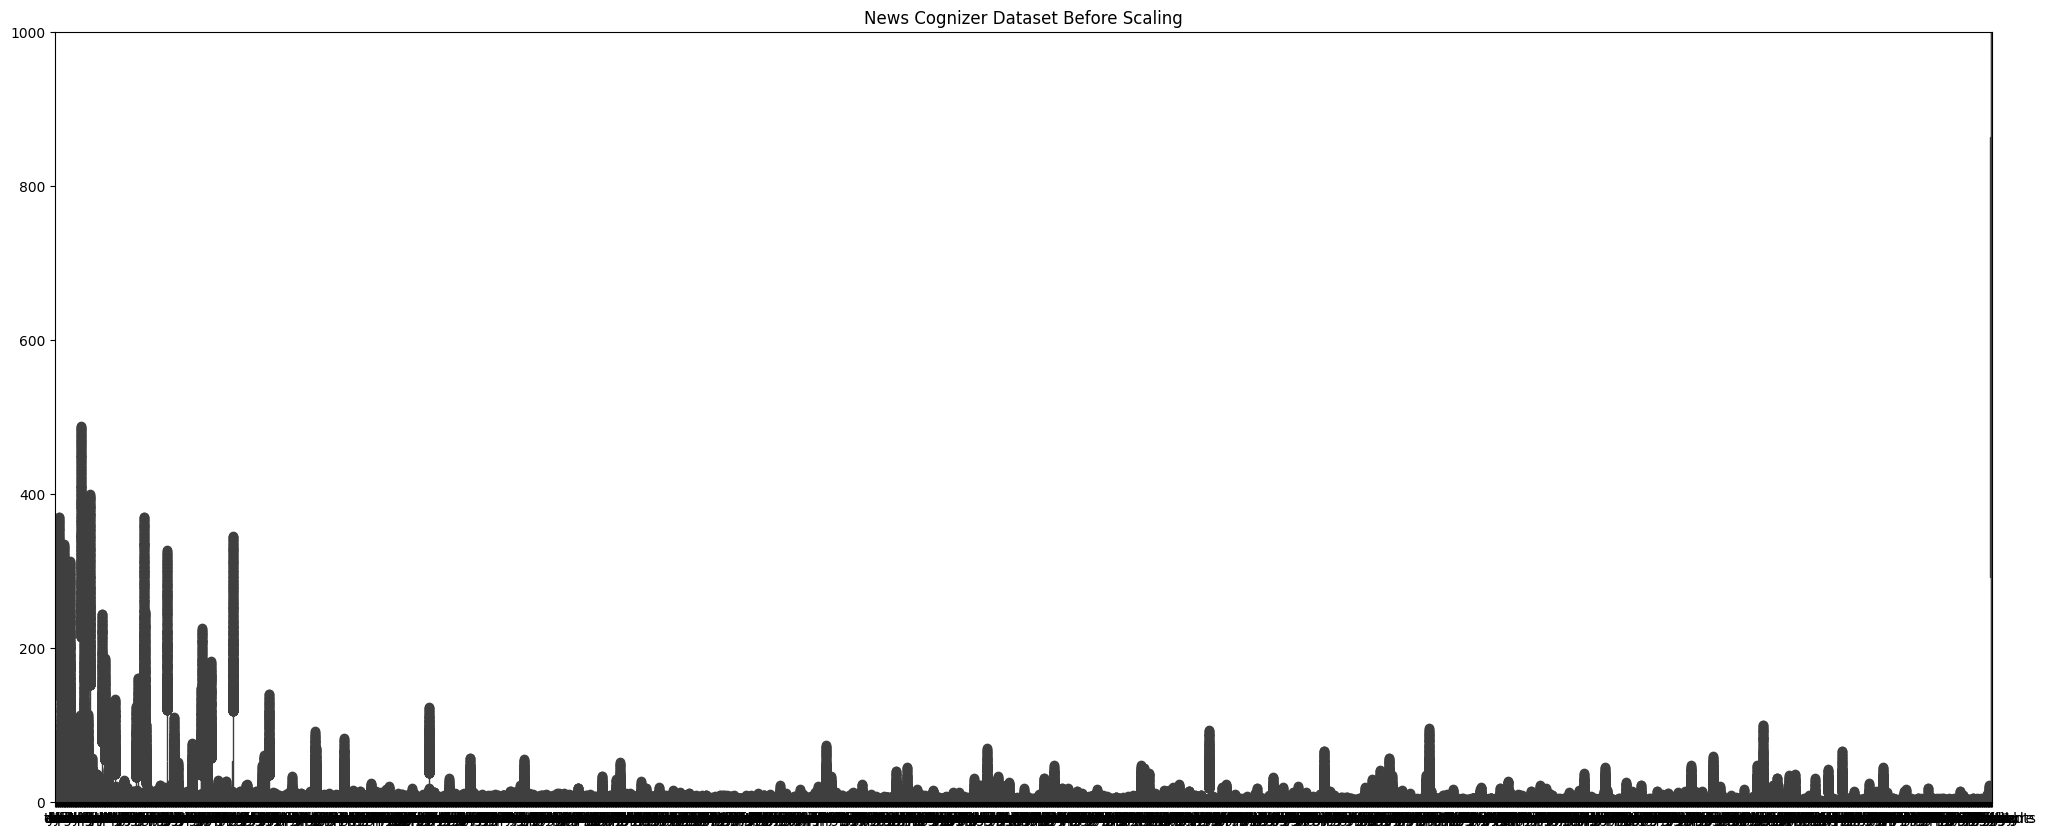

In [18]:
# Box plot before scaling
mplt_g7.figure(figsize=(25, 10))
sns_g7.boxplot(data=imputed_news_cognizer_df[columns_data])
mplt_g7.title('News Cognizer Dataset Before Scaling')
mplt_g7.ylim(0, 1000)
mplt_g7.show()

**Min-Max Scaler Implementation**

In [19]:
#perform scaling

# Create a MinMax Scaler instance
min_max_scaler_instance = MinMaxScaler()

# Scale columns
imputed_news_cognizer_df[columns_data] = min_max_scaler_instance.fit_transform(imputed_news_cognizer_df[columns_data])

**Display the Data After Scaling**

In [20]:
#Display the news cognizer data frame after scaling
imputed_news_cognizer_df

,News,the,to,ect,and,for,of,a,you,hou,...,valued,lay,infrastructure,military,allowing,ff,dry,author,Published,title.1
0,News 1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005391,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.119342,0.034949,0.541811
1,News 2,0.089888,0.183099,0.258427,0.115385,0.146341,0.034483,0.274933,0.026316,0.457627,...,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.938272,0.357419,0.676993
2,News 3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021563,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.119342,0.439322,0.103120
3,News 4,0.000000,0.070423,0.235955,0.000000,0.121951,0.017241,0.137466,0.052632,0.169492,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.300412,0.509220,0.617418
4,News 5,0.078652,0.084507,0.179775,0.019231,0.121951,0.034483,0.153639,0.000000,0.152542,...,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.300412,0.539880,0.306109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,News 5168,0.022472,0.028169,0.011236,0.057692,0.000000,0.000000,0.086253,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.360494,0.030875,0.842721
5168,News 5169,0.393258,0.380282,0.112360,0.038462,0.146341,0.086207,0.407008,0.105263,0.050847,...,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.360494,0.061321,0.690208
5169,News 5170,0.000000,0.000000,0.000000,0.019231,0.000000,0.000000,0.029650,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.360494,0.085978,0.827340
5170,News 5171,0.022472,0.098592,0.000000,0.000000,0.048780,0.017241,0.075472,0.052632,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.360494,0.086192,0.730503


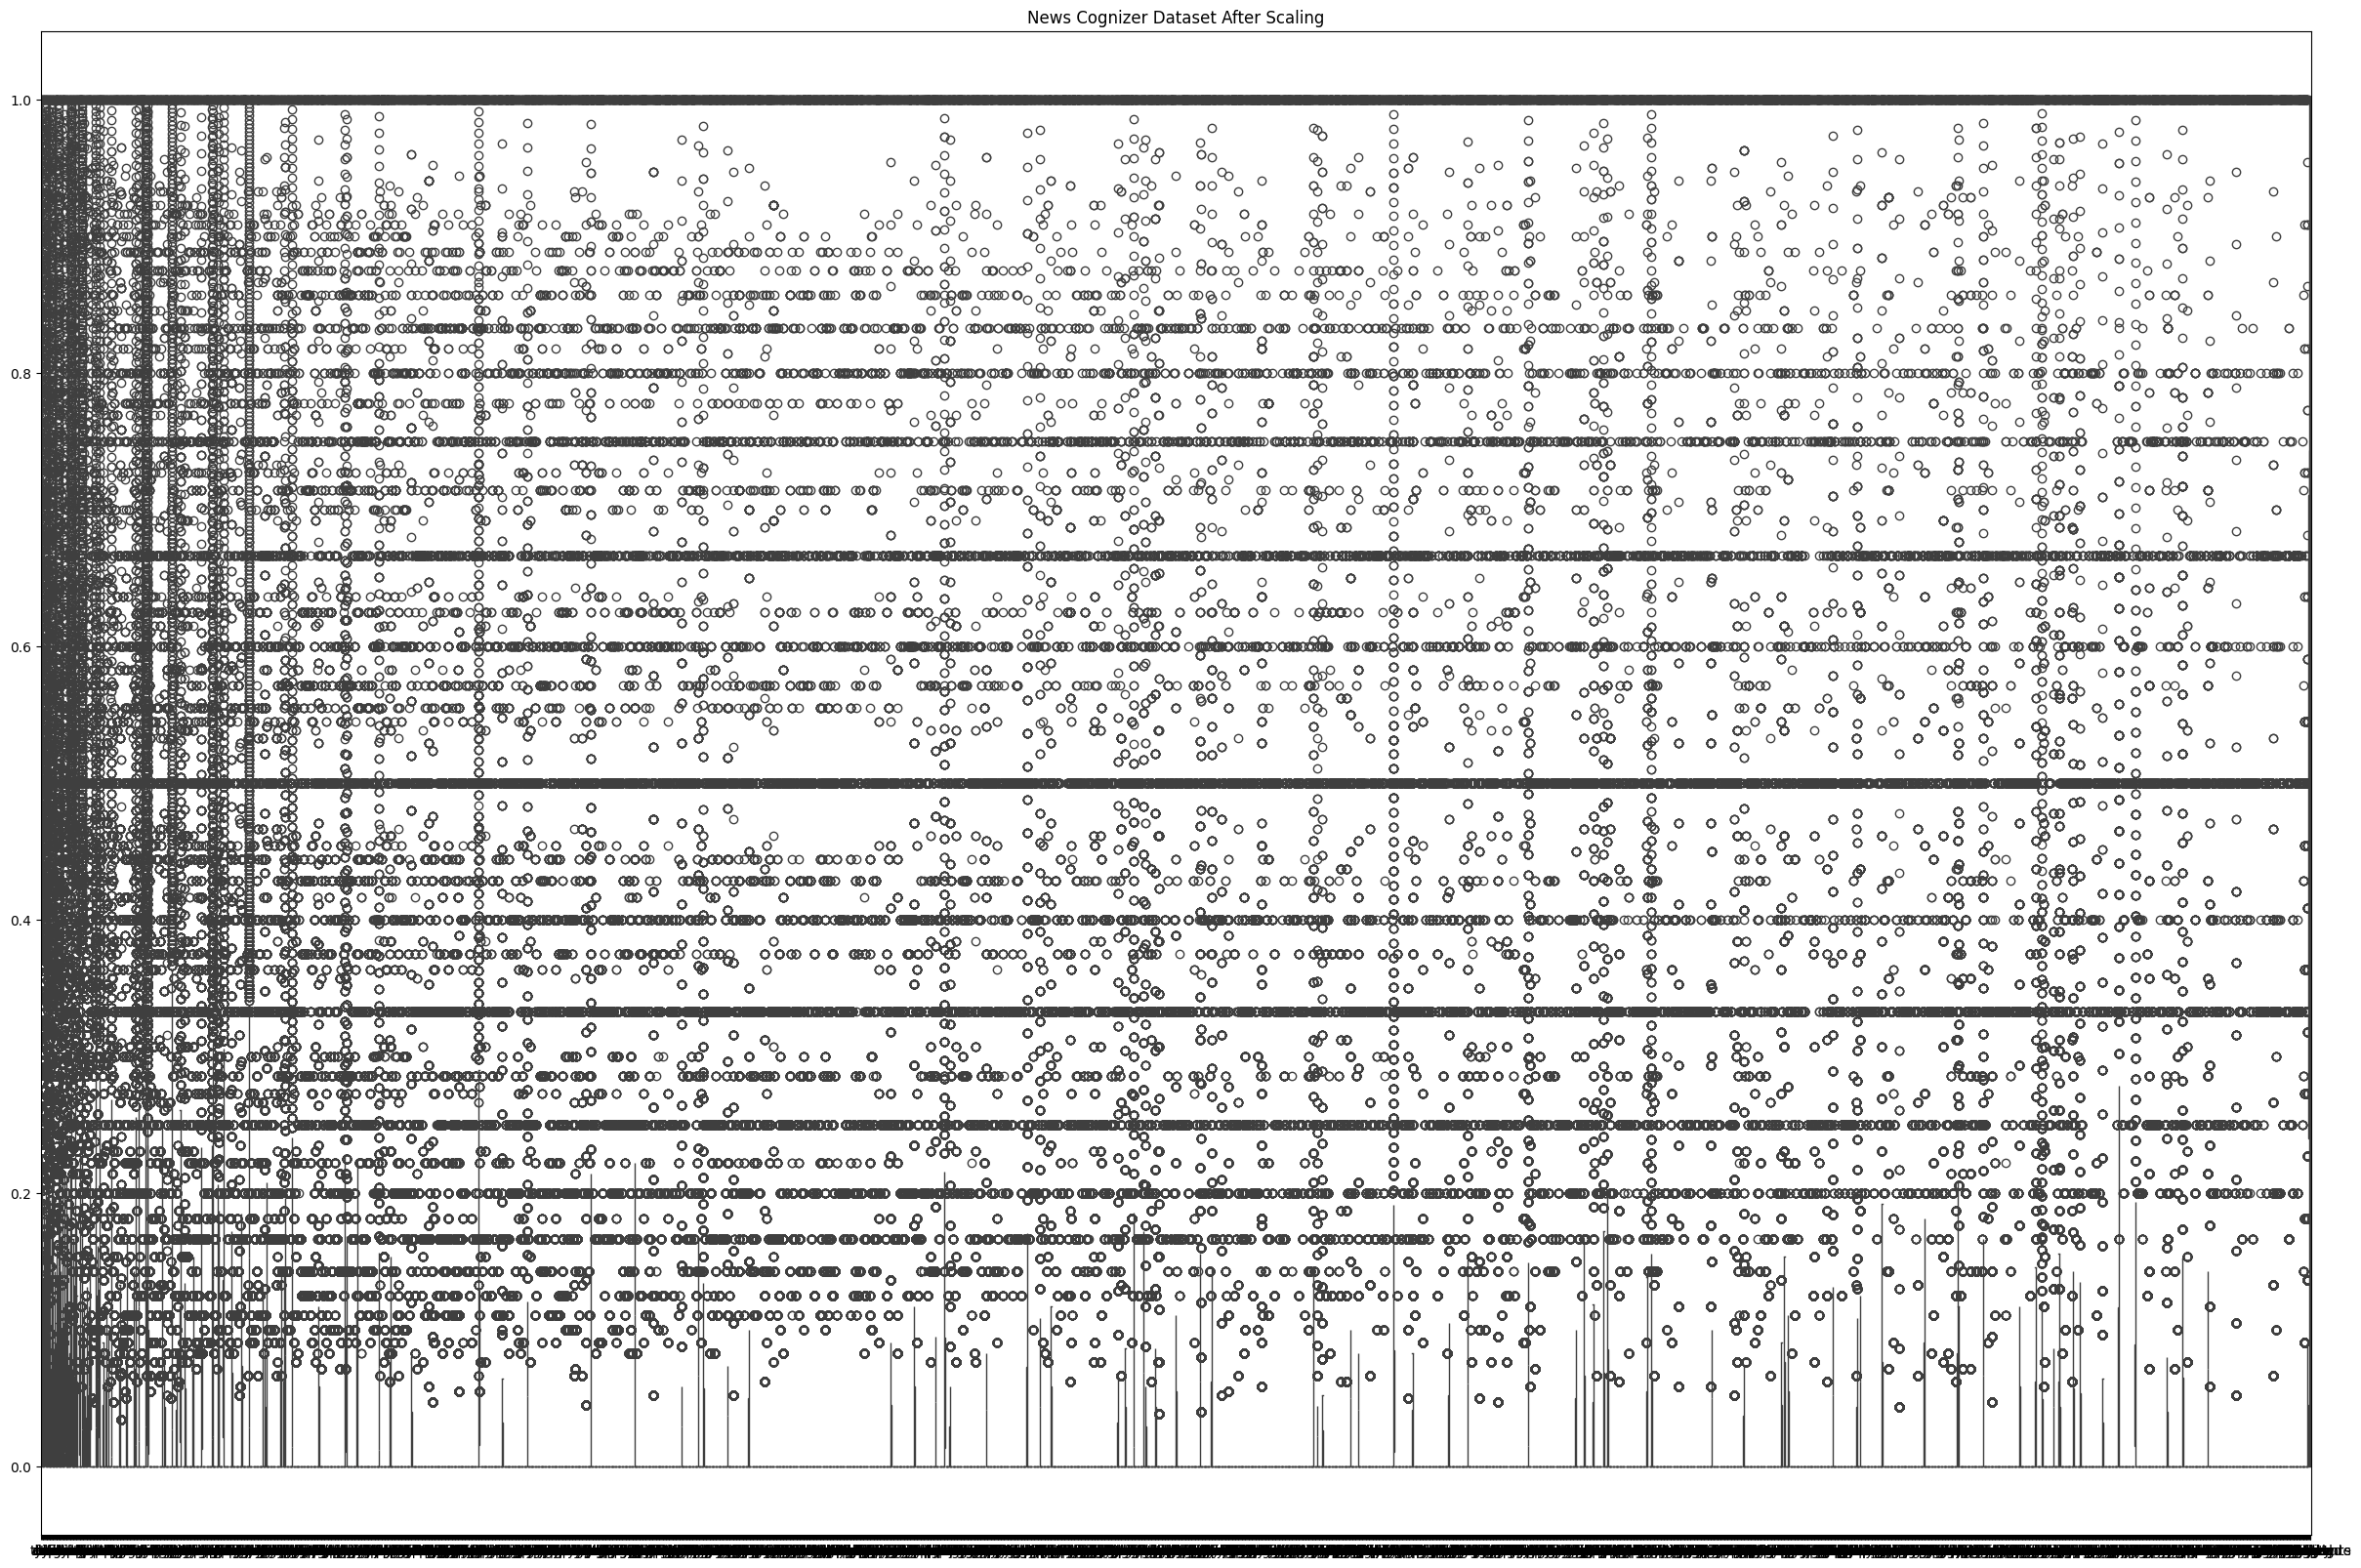

In [21]:
# Box plot after scaling
mplt_g7.figure(figsize=(30, 20))
sns_g7.boxplot(data=imputed_news_cognizer_df[columns_data])

mplt_g7.title('News Cognizer Dataset After Scaling')
mplt_g7.show()


# Defining the performance metrics of Different Models

In [71]:
# Assuming, computed accuracy, precision, recall, and f1-score for each model

performance_metrics = {
    "KNN_euclidean": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    },
    "KNN_manhattan": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    },
    "Random_Forest_Gini": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    },
    "Random_Forest_Entropy": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    },
    "SVM": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    },
    "NaiveBayes_Gaussian": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    },
    "NaiveBayes_Multinomial": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    },
    "Gradient_Boosting": {
        "accuracy": 0,
        "precision": 0,
        "recall": 0,
        "f1-score": 0
    }
}


# K-Nearest Neighbour

**K-Nearest Neighbour Implemenation using Euclidean**

In [26]:
# KNN implementation using euclidean

X = imputed_news_cognizer_df.iloc[:, 1:]  # features
y = news_cognizer_data_frame['target_data']  #target_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #training and testing the news cognizer dataset

knn_euclidean_results = {
    'knn_euclidean_accuracies': [],
    'knn_euclidean_precisions': [],
    'knn_euclidean_recalls': [],
    'knn_euclidean_f1_scores': []
}

knn_euclidean_accuracies = []
knn_euclidean_precisions = []
knn_euclidean_recalls = []
knn_euclidean_f1_scores = []

#hyperparam grid with different k-values
knn_euclidean_hyperparameters_grid = [
    {'knn_euclidean_model': 'KNN_k=3', "value": {'n_neighbors': 3, 'metric': 'euclidean'}},
    {'knn_euclidean_model': 'KNN_k=5', "value": {'n_neighbors': 5, 'metric': 'euclidean'}},
    {'knn_euclidean_model': 'KNN_k=7', "value": {'n_neighbors': 7, 'metric': 'euclidean'}},
    {'knn_euclidean_model': 'KNN_k=9', "value": {'n_neighbors': 9, 'metric': 'euclidean'}},
    {'knn_euclidean_model': 'KNN_k=11', "value": {'n_neighbors': 11, 'metric': 'euclidean'}},
    {'knn_euclidean_model': 'KNN_k=13', "value": {'n_neighbors': 13, 'metric': 'euclidean'}},
]

#Train & Test the model with each combination of hyperparam
for knn_euclidean_params in knn_euclidean_hyperparameters_grid:
    knn_euclidean_param_value = knn_euclidean_params['value']

    # create KNN Classifier Insatnce
    knn_euclidean_instance = KNeighborsClassifier(**knn_euclidean_param_value)

    # Train the model
    knn_euclidean_instance.fit(X_train, y_train)

    # Test the model
    knn_euclidean_y_prediction = knn_euclidean_instance.predict(X_test)

    # compute performance metrics
    knn_euclidean_accuracy = accuracy_g7(y_test, knn_euclidean_y_prediction)
    knn_euclidean_precision = precision_g7(y_test, knn_euclidean_y_prediction, average='weighted',zero_division=1)
    knn_euclidean_recall = recall_g7(y_test, knn_euclidean_y_prediction, average='weighted')
    knn_euclidean_f1_score = f1_score_g7(y_test, knn_euclidean_y_prediction, average='weighted')


    knn_euclidean_accuracies.append(knn_euclidean_accuracy)
    knn_euclidean_precisions.append(knn_euclidean_precision)
    knn_euclidean_recalls.append(knn_euclidean_recall)
    knn_euclidean_f1_scores.append(knn_euclidean_f1_score)

    print("\nHyperparameters" + str(knn_euclidean_params))
    print("Accuracy:", knn_euclidean_accuracy)
    print("Precision:", knn_euclidean_precision)
    print("Recall:", knn_euclidean_recall)
    print("F1-score:", knn_euclidean_f1_score)

knn_euclidean_results['knn_euclidean_accuracies'] = knn_euclidean_accuracies
knn_euclidean_results['knn_euclidean_precisions'] = knn_euclidean_precisions
knn_euclidean_results['knn_euclidean_recalls'] = knn_euclidean_recalls
knn_euclidean_results['knn_euclidean_f1_scores'] = knn_euclidean_f1_scores


Hyperparameters{'knn_euclidean_model': 'KNN_k=3', 'value': {'n_neighbors': 3, 'metric': 'euclidean'}}
Accuracy: 0.8028350515463918
Precision: 0.7598096307503525
Recall: 0.8028350515463918
F1-score: 0.7627681521343548

Hyperparameters{'knn_euclidean_model': 'KNN_k=5', 'value': {'n_neighbors': 5, 'metric': 'euclidean'}}
Accuracy: 0.8150773195876289
Precision: 0.7573781720315407
Recall: 0.8150773195876289
F1-score: 0.7578185526591167

Hyperparameters{'knn_euclidean_model': 'KNN_k=7', 'value': {'n_neighbors': 7, 'metric': 'euclidean'}}
Accuracy: 0.8208762886597938
Precision: 0.7622633332148747
Recall: 0.8208762886597938
F1-score: 0.7551843641187012

Hyperparameters{'knn_euclidean_model': 'KNN_k=9', 'value': {'n_neighbors': 9, 'metric': 'euclidean'}}
Accuracy: 0.8266752577319587
Precision: 0.7917166831426822
Recall: 0.8266752577319587
F1-score: 0.7576237996221035

Hyperparameters{'knn_euclidean_model': 'KNN_k=11', 'value': {'n_neighbors': 11, 'metric': 'euclidean'}}
Accuracy: 0.82731958762

**Visualization for K-NN Model with Euclidean**

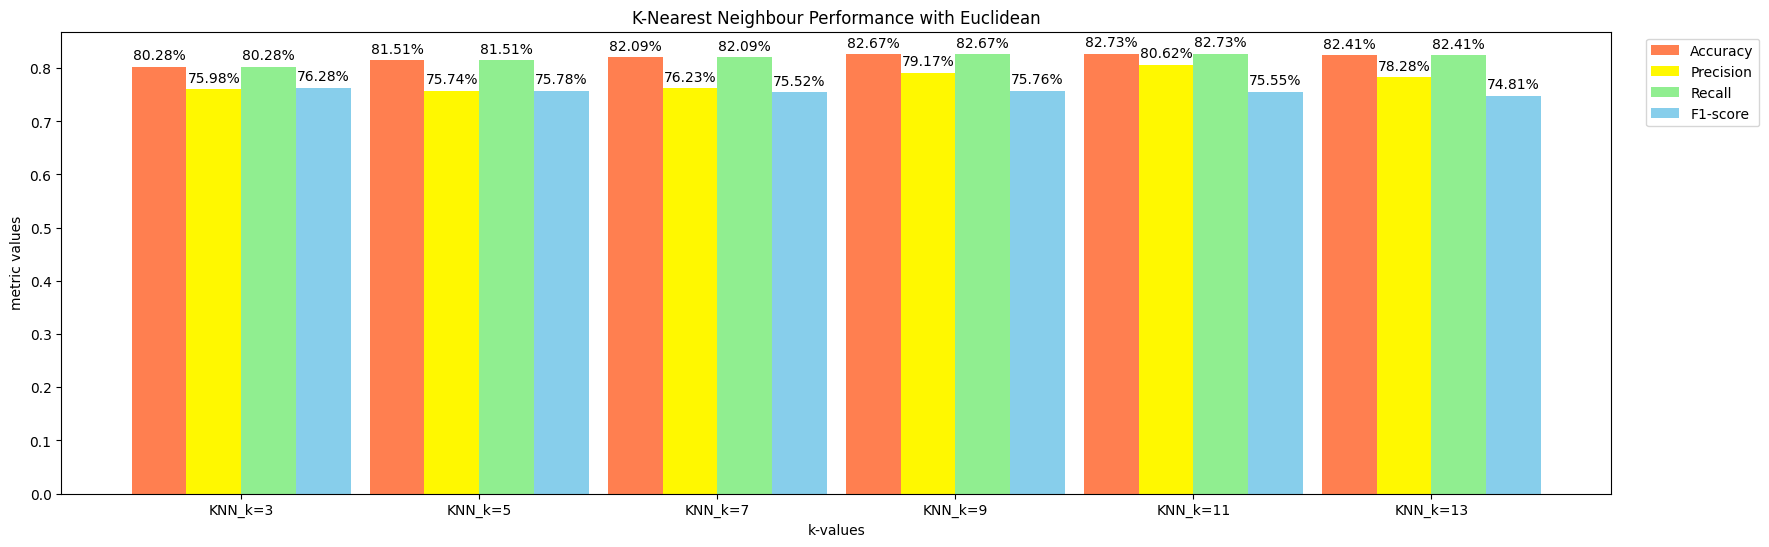

In [27]:
hyperparameter_names = [params['knn_euclidean_model'] for params in knn_euclidean_hyperparameters_grid]

figure, axis = mplt_g7.subplots(figsize=(20, 6))

bar_width = 0.23
index = range(len(hyperparameter_names))
custom_colors = ['#FF7F50', '#FFF800', '#90EE90', '#87CEEB']

knn_euclidean_accuracy_bar = axis.bar(index, knn_euclidean_results['knn_euclidean_accuracies'], bar_width, label='Accuracy', color=custom_colors[0])
knn_euclidean_precision_bar = axis.bar([i + bar_width for i in index], knn_euclidean_results['knn_euclidean_precisions'], bar_width, label='Precision',color=custom_colors[1])
knn_euclidean_recall_bar = axis.bar([i + 2 * bar_width for i in index], knn_euclidean_results['knn_euclidean_recalls'], bar_width, label='Recall',color=custom_colors[2])
knn_euclidean_f1score_bar = axis.bar([i + 3 * bar_width for i in index], knn_euclidean_results['knn_euclidean_f1_scores'], bar_width, label='F1-score',color=custom_colors[3])

axis.set_xlabel('k-values')
axis.set_ylabel('metric values')

axis.set_title('K-Nearest Neighbour Performance with Euclidean')
axis.set_xticks([i + 1.5 * bar_width for i in index])
axis.set_xticklabels(hyperparameter_names)
axis.legend(bbox_to_anchor=(1.1, 1), loc='upper right')

def add_values_bars(bars):
    for bar in bars:
        bar_height = bar.get_height()
        axis.annotate(f'{bar_height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, bar_height),
                      xytext=(0, 3),
                      textcoords="offset points",
                      ha='center', va='bottom')

add_values_bars(knn_euclidean_accuracy_bar)
add_values_bars(knn_euclidean_precision_bar)
add_values_bars(knn_euclidean_recall_bar)
add_values_bars(knn_euclidean_f1score_bar)

mplt_g7.show()


**Find The Best K-Value and Visualize it**


Best Hyperparameter: {'knn_euclidean_model': 'KNN_k=11', 'value': {'n_neighbors': 11, 'metric': 'euclidean'}}
Best Accuracy: 0.8273195876288659
Best Precision: 0.8062087182576873
Best Recall: 0.8273195876288659
Best F1 Score: 0.7554626985273961


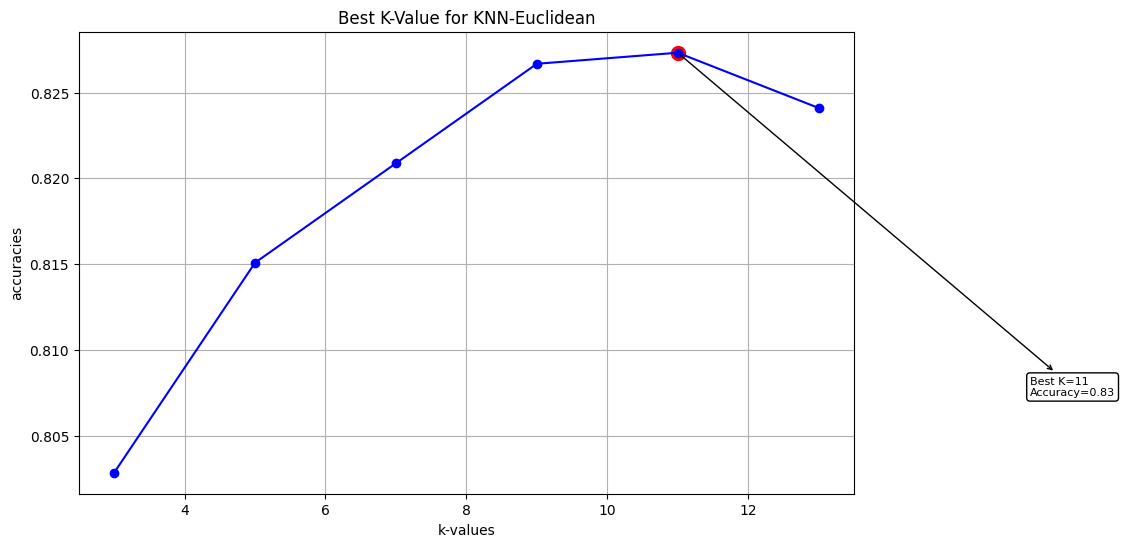

In [28]:
# Find the index of the best hyperparameter (maximum accuracy)
best_k_index = knn_euclidean_accuracies.index(max(knn_euclidean_accuracies))

# Retrieve the best hyperparameter and its corresponding metrics
best_k_hyperparameter = knn_euclidean_hyperparameters_grid[best_k_index]
best_k_accuracy = knn_euclidean_accuracies[best_k_index]
best_k_precision = knn_euclidean_precisions[best_k_index]
best_k_recall = knn_euclidean_recalls[best_k_index]
best_k_f1_score = knn_euclidean_f1_scores[best_k_index]

# Print the results
print("\nBest Hyperparameter:", best_k_hyperparameter)
print("Best Accuracy:", best_k_accuracy)
print("Best Precision:", best_k_precision)
print("Best Recall:", best_k_recall)
print("Best F1 Score:", best_k_f1_score)


# Store the best results
performance_metrics['KNN_euclidean'] = {
        "accuracy" : best_k_accuracy,
        "precision" : best_k_precision,
        "recall" : best_k_recall,
        "f1-score" : best_k_f1_score
    }



k_values = [param['value']['n_neighbors'] for param in knn_euclidean_hyperparameters_grid]
mplt_g7.figure(figsize=(10, 6))

mplt_g7.plot(k_values, knn_euclidean_accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
mplt_g7.scatter([best_k_hyperparameter['value']['n_neighbors']], [best_k_accuracy], color='red', marker='o', s=100)

mplt_g7.annotate(f'Best K={best_k_hyperparameter["value"]["n_neighbors"]}\nAccuracy={best_k_accuracy:.2f}',
                 xy=(best_k_hyperparameter['value']['n_neighbors'], best_k_accuracy),
                 xytext=(best_k_hyperparameter['value']['n_neighbors'] + 5, best_k_accuracy - 0.02),
                 arrowprops=dict(facecolor='black', arrowstyle='<-'),
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'),
                 fontsize=8)


mplt_g7.xlabel('k-values')
mplt_g7.ylabel('accuracies')
mplt_g7.title('Best K-Value for KNN-Euclidean')
mplt_g7.grid(True)
mplt_g7.show()

**Cross Validate the K-Value with k=5 folds**

Best K Value (with 5-fold cross-validation): K=13 and its accuracy is 0.8232044198895029


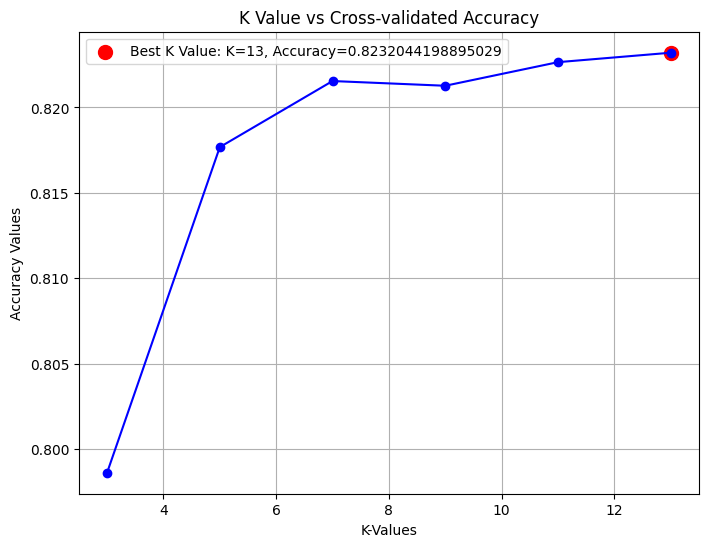

In [29]:
# cross Validation

cross_validation_accuracies = {}

for knn_params in knn_euclidean_hyperparameters_grid:
    knn_model = knn_params['knn_euclidean_model']
    k_value = int(knn_model.split('=')[1])
    knn_param_value = knn_params['value']

    knn_euclidean_instance.set_params(**knn_param_value)

    #cross-validation with StratifiedKFold
    cross_validation_scores = cross_val_score(knn_euclidean_instance, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
    cross_validation_accuracies[k_value] = cross_validation_scores.mean()

#Best K-Value
best_k_value_cv = max(cross_validation_accuracies, key=cross_validation_accuracies.get)
best_accuracy_cv = cross_validation_accuracies[best_k_value_cv]

print(f"Best K Value (with 5-fold cross-validation): K={best_k_value_cv} and its accuracy is {best_accuracy_cv}")

# Plot the cross-validated accuracies
mplt_g7.figure(figsize=(8, 6))
mplt_g7.plot(list(cross_validation_accuracies.keys()), list(cross_validation_accuracies.values()), marker='o', linestyle='-', color='b')
mplt_g7.title('K Value vs Cross-validated Accuracy')
mplt_g7.xlabel('K-Values')
mplt_g7.ylabel('Accuracy Values')
mplt_g7.scatter(best_k_value_cv, best_accuracy_cv, color='red', label=f'Best K Value: K={best_k_value_cv}, Accuracy={best_accuracy_cv}', s=100)

mplt_g7.legend()
mplt_g7.grid(True)
mplt_g7.show()


**K-NN Model With Manhattan using different Hyperparameters**

In [30]:
X = imputed_news_cognizer_df.iloc[:, 1:]  # features
y = news_cognizer_data_frame['target_data']  #target_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #training and testing the news cognizer dataset

knn_manhattan_results = {
    'knn_manhattan_accuracies': [],
    'knn_manhattan_precisions': [],
    'knn_manhattan_recalls': [],
    'knn_manhattan_f1_scores': []
}

knn_manhattan_accuracies = []
knn_manhattan_precisions = []
knn_manhattan_recalls = []
knn_manhattan_f1_scores = []

#create the param grid for different k values
knn_manhattan_hyperparameters_grid = [
    {'knn_manhattan_model': 'KNN_k=3', "value": {'n_neighbors': 3, 'metric': 'manhattan'}},
    {'knn_manhattan_model': 'KNN_k=5', "value": {'n_neighbors': 5, 'metric': 'manhattan'}},
    {'knn_manhattan_model': 'KNN_k=7', "value": {'n_neighbors': 7, 'metric': 'manhattan'}},
    {'knn_manhattan_model': 'KNN_k=9', "value": {'n_neighbors': 9, 'metric': 'manhattan'}},
    {'knn_manhattan_model': 'KNN_k=11', "value": {'n_neighbors': 11, 'metric': 'manhattan'}},
    {'knn_manhattan_model': 'KNN_k=13', "value": {'n_neighbors': 13, 'metric': 'manhattan'}},
]

#Traing and Testing the model for each value of k
for knn_manhattan_params in knn_manhattan_hyperparameters_grid:
    knn_manhattan_param_value = knn_manhattan_params['value']

    # create KNN Classifier Insatnce
    knn_instance_manhattan = KNeighborsClassifier(**knn_manhattan_param_value)

    # Train the model
    knn_instance_manhattan.fit(X_train, y_train)

    # Test the model
    knn_manhattan_y_prediction = knn_instance_manhattan.predict(X_test)

    # compute performance metrics
    knn_accuracy_manhattan = accuracy_g7(y_test, knn_manhattan_y_prediction)
    knn_precision_manhattan = precision_g7(y_test, knn_manhattan_y_prediction, average='weighted',zero_division=1)
    knn_recall_manhattan = recall_g7(y_test, knn_manhattan_y_prediction, average='weighted')
    knn_f1_manhattan = f1_score_g7(y_test, knn_manhattan_y_prediction, average='weighted')

    knn_manhattan_accuracies.append(knn_accuracy_manhattan)
    knn_manhattan_precisions.append(knn_precision_manhattan)
    knn_manhattan_recalls.append(knn_recall_manhattan)
    knn_manhattan_f1_scores.append(knn_f1_manhattan)

    # Print the results
    print("\nHyperparameters" + str(knn_manhattan_params))
    print("Accuracy:", knn_accuracy_manhattan)
    print("Precision:", knn_precision_manhattan)
    print("Recall:", knn_recall_manhattan)
    print("F1-score:", knn_f1_manhattan)

knn_manhattan_results['knn_manhattan_accuracies'] = knn_manhattan_accuracies
knn_manhattan_results['knn_manhattan_precisions'] = knn_manhattan_precisions
knn_manhattan_results['knn_manhattan_recalls'] = knn_manhattan_recalls
knn_manhattan_results['knn_manhattan_f1_scores'] = knn_manhattan_f1_scores


Hyperparameters{'knn_manhattan_model': 'KNN_k=3', 'value': {'n_neighbors': 3, 'metric': 'manhattan'}}
Accuracy: 0.7970360824742269
Precision: 0.7499012105404809
Recall: 0.7970360824742269
F1-score: 0.7573677987284692

Hyperparameters{'knn_manhattan_model': 'KNN_k=5', 'value': {'n_neighbors': 5, 'metric': 'manhattan'}}
Accuracy: 0.8182989690721649
Precision: 0.7637270466360944
Recall: 0.8182989690721649
F1-score: 0.7634009088826959

Hyperparameters{'knn_manhattan_model': 'KNN_k=7', 'value': {'n_neighbors': 7, 'metric': 'manhattan'}}
Accuracy: 0.8240979381443299
Precision: 0.760139101267696
Recall: 0.8240979381443299
F1-score: 0.760622315788011

Hyperparameters{'knn_manhattan_model': 'KNN_k=9', 'value': {'n_neighbors': 9, 'metric': 'manhattan'}}
Accuracy: 0.8279639175257731
Precision: 0.7737301909536587
Recall: 0.8279639175257731
F1-score: 0.7593428964911403

Hyperparameters{'knn_manhattan_model': 'KNN_k=11', 'value': {'n_neighbors': 11, 'metric': 'manhattan'}}
Accuracy: 0.8279639175257

**Visualize the performance of K-NN Model With Manhattan**

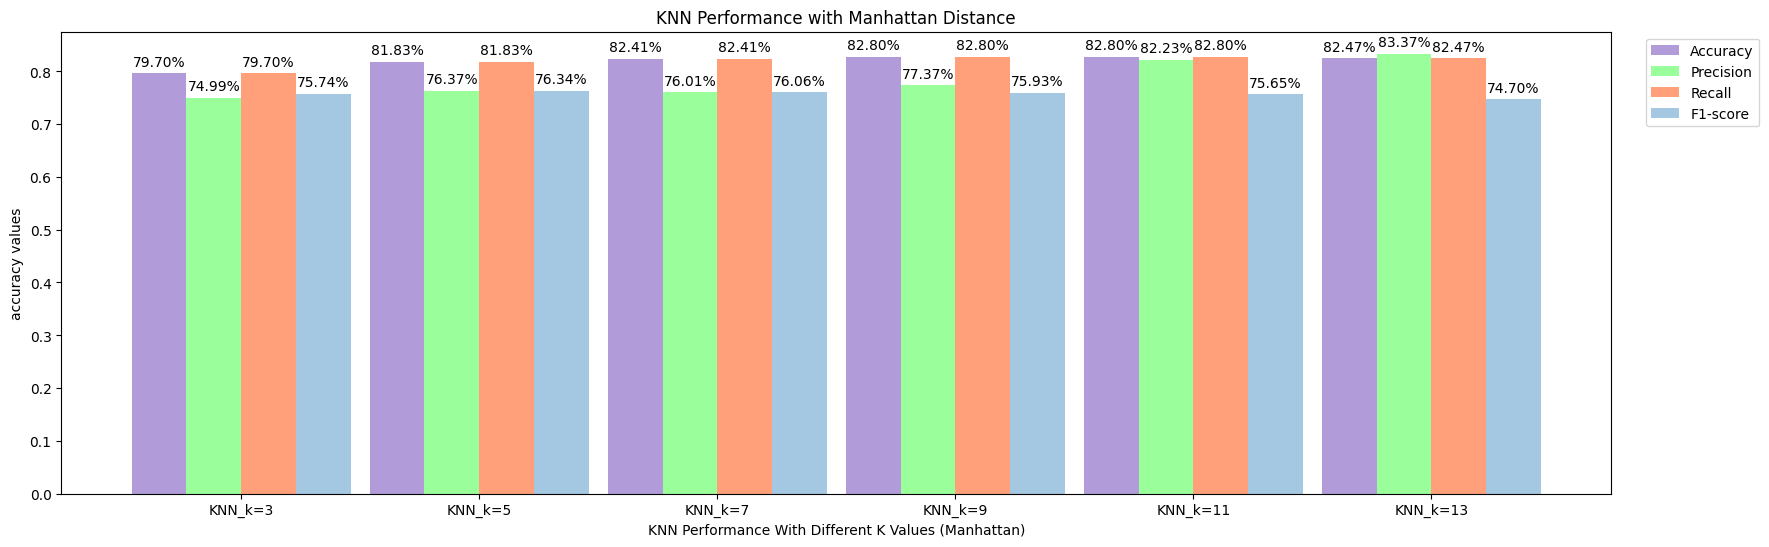

In [31]:
# visualize the performance metrics for different values of k

hyperparameter_names_manhattan = [params['knn_manhattan_model'] for params in knn_manhattan_hyperparameters_grid]

# Create a bar plot for each metric
fig_manhattan, ax_manhattan = mplt_g7.subplots(figsize=(20, 6))

bar_width_manhattan = 0.23
index_manhattan = range(len(hyperparameter_names_manhattan))
custom_colors_manhattan = ['#B19CD9', '#9AFF9A', '#FFA07A', '#A4C8E1']

accuracy_bar_manhattan = ax_manhattan.bar(index_manhattan, knn_manhattan_results['knn_manhattan_accuracies'], bar_width_manhattan, label='Accuracy', color=custom_colors_manhattan[0])
precision_bar_manhattan = ax_manhattan.bar([i + bar_width for i in index_manhattan], knn_manhattan_results['knn_manhattan_precisions'], bar_width_manhattan, label='Precision', color=custom_colors_manhattan[1])
recall_bar_manhattan = ax_manhattan.bar([i + 2 * bar_width for i in index_manhattan], knn_manhattan_results['knn_manhattan_recalls'], bar_width_manhattan, label='Recall', color=custom_colors_manhattan[2])
f1score_bar_manhattan = ax_manhattan.bar([i + 3 * bar_width for i in index_manhattan], knn_manhattan_results['knn_manhattan_f1_scores'], bar_width_manhattan, label='F1-score', color=custom_colors_manhattan[3])

ax_manhattan.set_xlabel('KNN Performance With Different K Values (Manhattan)')
ax_manhattan.set_ylabel('accuracy values')
ax_manhattan.set_title('KNN Performance with Manhattan Distance')

ax_manhattan.set_xticks([i + 1.5 * bar_width for i in index_manhattan])
ax_manhattan.set_xticklabels(hyperparameter_names_manhattan)
ax_manhattan.legend(bbox_to_anchor=(1.1, 1), loc='upper right')

def add_values_to_bars(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax_manhattan.annotate(f'{bar_height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, bar_height),
                              xytext=(0, 3),
                              textcoords="offset points",
                              ha='center', va='bottom')

add_values_to_bars(accuracy_bar_manhattan)
add_values_to_bars(precision_bar_manhattan)
add_values_to_bars(recall_bar_manhattan)
add_values_to_bars(f1score_bar_manhattan)

mplt_g7.show()


**Find th Best K-Value for K-NN Manhattan**


Best Hyperparameter: {'knn_euclidean_model': 'KNN_k=11', 'value': {'n_neighbors': 11, 'metric': 'euclidean'}}
Best Accuracy: 0.8279639175257731
Best Precision: 0.7737301909536587
Best Recall: 0.8279639175257731
Best F1 Score: 0.7593428964911403
Best K Value: K=3 and its accuracy is 0.8279639175257731


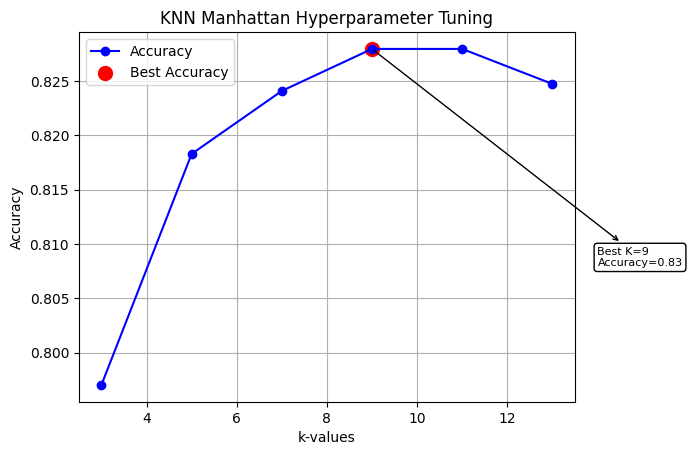

In [32]:
# Find the index of the best hyperparameter (maximum accuracy)
best_k_index_manhattan = knn_manhattan_accuracies.index(max(knn_manhattan_accuracies))

# Retrieve the best hyperparameter and its corresponding metrics
best_k_manhattan_hyperparameter = knn_manhattan_hyperparameters_grid[best_k_index_manhattan]
best_k_accuracy = knn_manhattan_accuracies[best_k_index_manhattan]
best_k_precision = knn_manhattan_precisions[best_k_index_manhattan]
best_k_recall = knn_manhattan_recalls[best_k_index_manhattan]
best_k_recall = knn_manhattan_recalls[best_k_index_manhattan]
best_k_f1_score = knn_manhattan_f1_scores[best_k_index_manhattan]

# Print the results
print("\nBest Hyperparameter:", best_k_hyperparameter)
print("Best Accuracy:", best_k_accuracy)
print("Best Precision:", best_k_precision)
print("Best Recall:", best_k_recall)
print("Best F1 Score:", best_k_f1_score)


# Store the best results
performance_metrics['KNN_manhattan'] = {
        "accuracy" : best_k_accuracy,
        "precision" : best_k_precision,
        "recall" : best_k_recall,
        "f1-score" : best_k_f1_score
    }

print(f"Best K Value: K={best_k_index_manhattan} and its accuracy is {best_k_accuracy}")

k_values = [param['value']['n_neighbors'] for param in knn_manhattan_hyperparameters_grid]
mplt_g7.plot(k_values, knn_manhattan_accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
mplt_g7.scatter([best_k_manhattan_hyperparameter['value']['n_neighbors']], best_k_accuracy, color='red', label='Best Accuracy',marker='o', s=100)

mplt_g7.annotate(f'Best K={best_k_manhattan_hyperparameter["value"]["n_neighbors"]}\nAccuracy={best_k_accuracy:.2f}',
                 xy=(best_k_manhattan_hyperparameter['value']['n_neighbors'], best_k_accuracy),
                 xytext=(best_k_manhattan_hyperparameter['value']['n_neighbors'] + 5, best_k_accuracy - 0.02),
                 arrowprops=dict(facecolor='black', arrowstyle='<-'),
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'),
                 fontsize=8)

# Add labels and title
mplt_g7.xlabel('k-values')
mplt_g7.ylabel('Accuracy')
mplt_g7.title('KNN Manhattan Hyperparameter Tuning')
mplt_g7.legend()
mplt_g7.grid(True)
mplt_g7.show()


**Cross Validate the K-Value using cross_val_score for K-NN Manhattan**

In [33]:
#cross validation for different values of k using manhattan

knn_manhattan_kf_instance = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store mean accuracies and standard deviations
knn_manhattan_mean_accuracies = []
knn_manhattan_std_accuracies = []

# Iterate over hyperparameters for KNN with Manhattan distance
for knn_manhattan_params in knn_manhattan_hyperparameters_grid:
    knn_manhattan_param_value = knn_manhattan_params['value']

    # Create KNN Classifier Instance
    knn_instance_manhattan_instance = KNeighborsClassifier(**knn_manhattan_param_value)

    # Use cross_val_score for k-fold cross-validation
    knn_manhattan_scores_cv = cross_val_score(knn_instance_manhattan_instance, X_train, y_train, cv=knn_manhattan_kf_instance, scoring='accuracy')

    # Calculate the mean and standard deviation of the scores
    knn_manhattan_mean_accuracy_cv = knn_manhattan_scores_cv.mean()
    knn_manhattan_std_accuracy_cv = knn_manhattan_scores_cv.std()

    # Print the results
    print("\nHyperparameters" + str(knn_manhattan_params))
    print(f"Mean Accuracy: {knn_manhattan_mean_accuracy_cv}")
    print(f"Standard Deviation of Accuracy: {knn_manhattan_std_accuracy_cv}")

    # Append mean and standard deviation to lists
    knn_manhattan_mean_accuracies.append(knn_manhattan_mean_accuracy_cv)
    knn_manhattan_std_accuracies.append(knn_manhattan_std_accuracy_cv)



Hyperparameters{'knn_manhattan_model': 'KNN_k=3', 'value': {'n_neighbors': 3, 'metric': 'manhattan'}}
Mean Accuracy: 0.7941988950276244
Standard Deviation of Accuracy: 0.009286042162415253

Hyperparameters{'knn_manhattan_model': 'KNN_k=5', 'value': {'n_neighbors': 5, 'metric': 'manhattan'}}
Mean Accuracy: 0.819060773480663
Standard Deviation of Accuracy: 0.006052182955858189

Hyperparameters{'knn_manhattan_model': 'KNN_k=7', 'value': {'n_neighbors': 7, 'metric': 'manhattan'}}
Mean Accuracy: 0.8243093922651934
Standard Deviation of Accuracy: 0.006262864115334018

Hyperparameters{'knn_manhattan_model': 'KNN_k=9', 'value': {'n_neighbors': 9, 'metric': 'manhattan'}}
Mean Accuracy: 0.8248618784530386
Standard Deviation of Accuracy: 0.005552417470232514

Hyperparameters{'knn_manhattan_model': 'KNN_k=11', 'value': {'n_neighbors': 11, 'metric': 'manhattan'}}
Mean Accuracy: 0.8232044198895027
Standard Deviation of Accuracy: 0.0053849692512756685

Hyperparameters{'knn_manhattan_model': 'KNN_k=1

**Visualize the Best K-Value after Cross Validation**

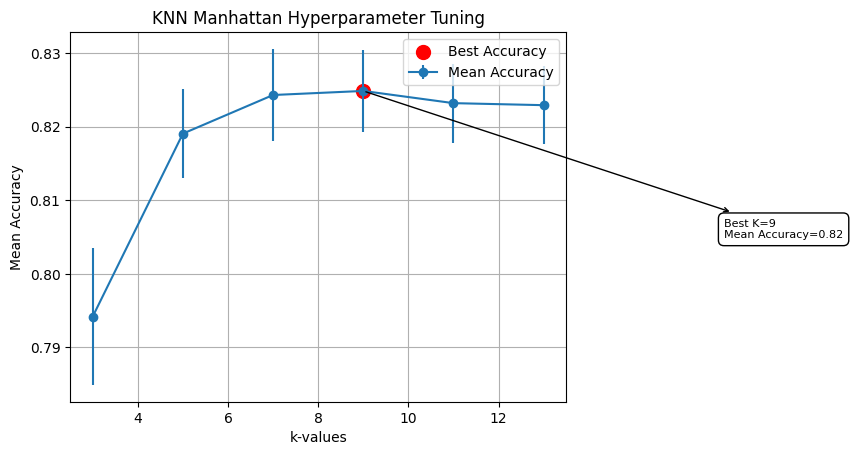

In [34]:
#plot cross validation results...

knn_manhattan_mean_accuracies = npy_g7.array(knn_manhattan_mean_accuracies)
knn_manhattan_std_accuracies = npy_g7.array(knn_manhattan_std_accuracies)

# Find the index of the hyperparameter with the highest mean accuracy
knn_manhattan_best_k_value = npy_g7.argmax(knn_manhattan_mean_accuracies)

# Retrieve the best hyperparameter and its corresponding metrics
best_k_hyperparameter = knn_manhattan_hyperparameters_grid[knn_manhattan_best_k_value]
best_mean_accuracy = knn_manhattan_mean_accuracies[knn_manhattan_best_k_value]
best_std_accuracy = knn_manhattan_std_accuracies[knn_manhattan_best_k_value]

# Plot the line chart
k_values = [param['value']['n_neighbors'] for param in knn_manhattan_hyperparameters_grid]
mplt_g7.errorbar(k_values, knn_manhattan_mean_accuracies, yerr=knn_manhattan_std_accuracies, fmt='o-', label='Mean Accuracy')

# Mark the highest mean accuracy with red
mplt_g7.scatter([best_k_hyperparameter['value']['n_neighbors']], [best_mean_accuracy], color='red', label='Best Accuracy', marker='o', s=100)

# Highlight the point with the highest mean accuracy
mplt_g7.annotate(f'Best K={best_k_hyperparameter["value"]["n_neighbors"]}\nMean Accuracy={best_mean_accuracy:.2f}',
             xy=(best_k_hyperparameter['value']['n_neighbors'], best_mean_accuracy),
             xytext=(best_k_hyperparameter['value']['n_neighbors'] + 8, best_mean_accuracy - 0.02),
             arrowprops=dict(facecolor='black', arrowstyle='<-'),
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'),
             fontsize=8)

# Add labels and title
mplt_g7.xlabel('k-values')
mplt_g7.ylabel('Mean Accuracy')
mplt_g7.title('KNN Manhattan Hyperparameter Tuning')
mplt_g7.legend()
mplt_g7.grid(True)
mplt_g7.show()


# Random-Forest

In [35]:
#random forest implemntation

X = imputed_news_cognizer_df.iloc[:, 1:]  # features
y = news_cognizer_data_frame['target_data']  #target_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #train and test the news cognozer dataset

results = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1': {}
}

#create random forest param grid with diffrent values
rf_param_grid = {
    'n_estimators': [5, 10, 15, 20, 25],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 7],
}

# loop through all combinations, train and test the model
for n_estimators in rf_param_grid['n_estimators']:
    for max_depth in rf_param_grid['max_depth']:
        for min_samples_split in rf_param_grid['min_samples_split']:
            for min_samples_leaf in rf_param_grid['min_samples_leaf']:

                #create random forest classifier instance and use criteria gini
                rf_classifier_instance = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    criterion='gini',
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                )

                #train and predict the model
                rf_classifier_instance.fit(X_train, y_train)
                rf_y_pred = rf_classifier_instance.predict(X_test)

                #compute the performance metrics
                rf_accuracy = accuracy_g7(y_test, rf_y_pred)
                rf_precision = precision_g7(y_test, rf_y_pred, average='weighted',zero_division=1)
                rf_recall = recall_g7(y_test, rf_y_pred, average='weighted')
                rf_f1_score = f1_score_g7(y_test, rf_y_pred, average='weighted')

                #print the performance metrics for different combinations
                print(f"\nParameters: {{'n_estimators': {n_estimators}, 'max_depth': {max_depth}, 'min_samples_split': {min_samples_split}, 'min_samples_leaf': {min_samples_leaf}}}")
                print(f"Accuracy: {rf_accuracy:.4f}")
                print(f"Precision: {rf_precision:.4f}")
                print(f"Recall: {rf_recall:.4f}")
                print(f"F1 Score: {rf_f1_score:.4f}")

                #store the perfomance metrics
                results['accuracy'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_accuracy
                results['precision'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_precision
                results['recall'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_recall
                results['f1'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_f1_score



Parameters: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Parameters: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Parameters: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Parameters: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 7}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Parameters: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Parameters: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Parameters: {'n_estim

***Compute the Best Metrcis for Random Forest***

In [36]:
#compute the best metrics based on accuracy
best_accuracy_params = max(results['accuracy'], key=results['accuracy'].get)

# Map hyperparameter names to values
best_hyperparameter_set = {
    'n_estimators': best_accuracy_params[0],
    'max_depth': best_accuracy_params[1],
    'min_samples_split': best_accuracy_params[2],
    'min_samples_leaf': best_accuracy_params[3]
}

# fetch the corresponding metrics
rf_gini_best_accuracy = results['accuracy'][best_accuracy_params]
rf_gini_best_precision = results['precision'][best_accuracy_params]
rf_gini_best_recall = results['recall'][best_accuracy_params]
rf_gini_best_f1 = results['f1'][best_accuracy_params]

# Store the best results
performance_metrics['Random_Forest_Gini'] = {
        "accuracy" : rf_gini_best_accuracy,
        "precision" : rf_gini_best_precision,
        "recall" : rf_gini_best_recall,
        "f1-score" : rf_gini_best_f1
    }

# Print the results
print("\nBest Hyperparameter Combination (Accuracy):", best_hyperparameter_set)

print("\nBest Accuracy:", rf_gini_best_accuracy)
print("Best Precision:", rf_gini_best_precision)
print("Best Recall:", rf_gini_best_recall)
print("Best F1 Score:", rf_gini_best_f1)


Best Hyperparameter Combination (Accuracy): {'n_estimators': 20, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2}

Best Accuracy: 0.8292525773195877
Best Precision: 0.8482513672162274
Best Recall: 0.8292525773195877
Best F1 Score: 0.7568224687713863


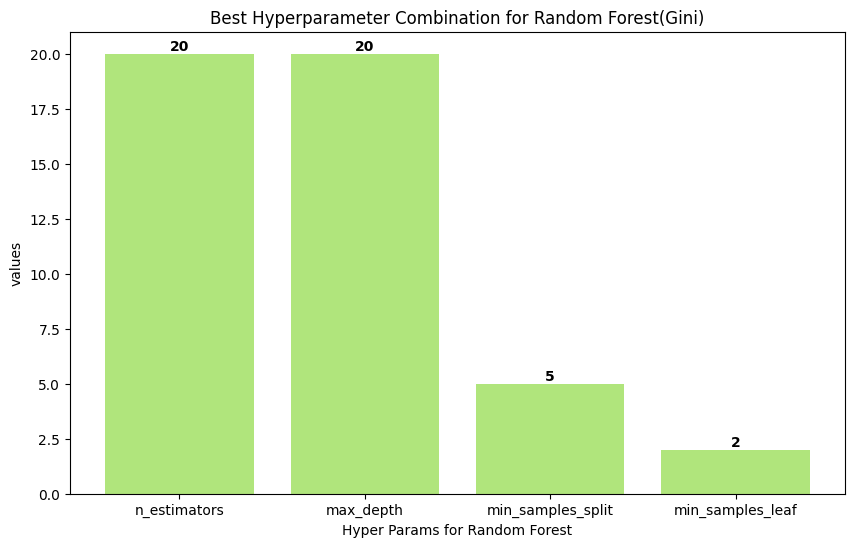

In [37]:
#plot the best Hyperparameters..

figure, axis = mplt_g7.subplots(figsize=(10, 6)) #size of the figure
rf_params_grid = list(best_hyperparameter_set.keys())
values = list(best_hyperparameter_set.values())

bars = axis.bar(rf_params_grid, values, color='#B0E57C')

#add values to each bar
for bar, value in zip(bars, values):
    axis.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

#set title, x-lable, y-label
axis.set_ylabel('values')
axis.set_xlabel('Hyper Params for Random Forest')
axis.set_title('Best Hyperparameter Combination for Random Forest(Gini)')

mplt_g7.show()


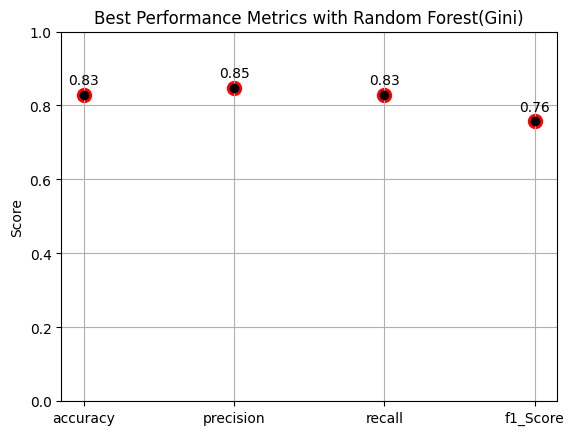

In [38]:
best_metric_values = [rf_gini_best_accuracy, rf_gini_best_precision, rf_gini_best_recall, rf_gini_best_f1]
metrics_names = ['accuracy', 'precision', 'recall', 'f1_Score']

# Plot a line chart with a grid
mplt_g7.plot(metrics_names, best_metric_values, marker='o', linestyle='', color='black', label='Line')
mplt_g7.scatter(metrics_names, best_metric_values, color='red', label='Points')
mplt_g7.scatter(metrics_names, best_metric_values, color='red', marker='o', s=100)

#set title, x-lable, y-label
mplt_g7.title('Best Performance Metrics with Random Forest(Gini)')
mplt_g7.ylabel('Score')
mplt_g7.ylim(0, 1)

# add values to metrics
offset = 0.02  # Adjust this value based on your preference
for name, value in zip(metrics_names, best_metric_values):
    mplt_g7.text(name, value + offset, f'{value:.2f}', ha='center', va='bottom')

mplt_g7.grid(True)
mplt_g7.show()



Best Accuracy: 0.8237569060773481
Best Hyperparameters: {'n_estimators': 5, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4}





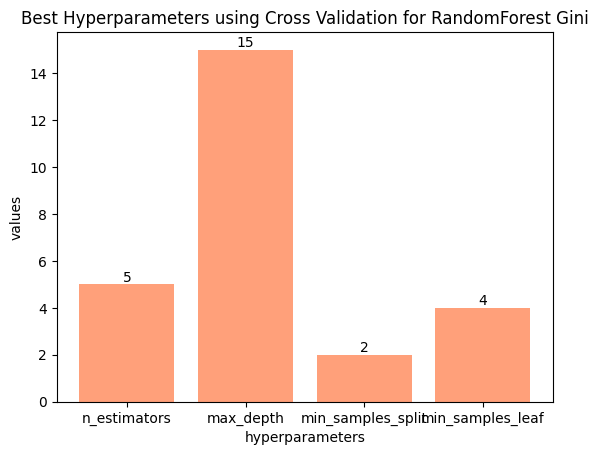

In [39]:
#cross validation.

# Create a KFold instance with 5 splits
rf_gini_kf_instance = KFold(n_splits=5, shuffle=True, random_state=42)

rf_gini_cv_best_accuracy = -float('inf')
rf_gini_cv_best_hyperparameters = None

# looping the hyperparameters with different combinations
for n_estimators in rf_param_grid['n_estimators']:
    for max_depth in rf_param_grid['max_depth']:
        for min_samples_split in rf_param_grid['min_samples_split']:
            for min_samples_leaf in rf_param_grid['min_samples_leaf']:

                # creating random forest insatnce
                rf_classifier_instance = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    criterion='gini', #rf with criteria gini
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                )

                #cross validation with respect to accuracy
                rf_gini_accuracy_scores = cross_val_score(rf_classifier_instance, X_train, y_train, cv=rf_gini_kf_instance, scoring='accuracy')
                rf_gini_mean_accuracy = rf_gini_accuracy_scores.mean() #computing the mean value of the accuracies

                # Update best accuracy and hyperparameters
                if rf_gini_mean_accuracy > rf_gini_cv_best_accuracy:
                    rf_gini_cv_best_accuracy = rf_gini_mean_accuracy
                    rf_gini_cv_best_hyperparameters = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                    }

# Print the best accuracy and hyperparameters
print("\nBest Accuracy:", rf_gini_mean_accuracy)
print("Best Hyperparameters:", rf_gini_cv_best_hyperparameters)
print("\n\n")
# Transpose the dictionary for plotting
hyperparameters, values = list(rf_gini_cv_best_hyperparameters.keys()), list(rf_gini_cv_best_hyperparameters.values())

# Bar plot
figure, axes = mplt_g7.subplots()
axes.bar(hyperparameters, values, color='#FFA07A')

#set title, x-lable, y-label
axes.set_title('Best Hyperparameters using Cross Validation for RandomForest Gini')
axes.set_xlabel('hyperparameters')
axes.set_ylabel('values')

# Display the values on the bars
for hyperparameter, value in zip(hyperparameters, values):
    axes.text(hyperparameter, value, str(value), ha='center', va='bottom')

mplt_g7.show()


***Random Forest with Entropy***

In [41]:
X = imputed_news_cognizer_df.iloc[:, 1:]  # features
y = news_cognizer_data_frame['target_data']  #target_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_entropy_results = {
    'rf_entropy_accuracy': {},
    'rf_entropy_precision': {},
    'rf_entropy_recall': {},
    'rf_entropy_f1_score': {}
}

rf_entropy_param_grid = {
    'n_estimators': [5, 10, 15, 20, 25],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 7],
}

# Iterate through all combinations
for n_estimators in rf_param_grid['n_estimators']:
    for max_depth in rf_param_grid['max_depth']:
        for min_samples_split in rf_param_grid['min_samples_split']:
            for min_samples_leaf in rf_param_grid['min_samples_leaf']:

                rf_entropy_classifier = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    criterion='entropy',
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                )

                rf_entropy_classifier.fit(X_train, y_train)
                rf_entropy_y_pred = rf_entropy_classifier.predict(X_test)

                #computing performance metrics such as accuracy,precision,recall,f1_score
                rf_entropy_accuracy = accuracy_g7(y_test, rf_entropy_y_pred)
                rf_entropy_precision = precision_g7(y_test, rf_entropy_y_pred,average='weighted',zero_division=1)
                rf_entropy_recall = recall_g7(y_test, rf_entropy_y_pred,average='weighted')
                rf_entropy_f1_score = f1_score_g7(y_test, rf_entropy_y_pred, average='weighted')

                #displaying the hyperparams and respective presformance metrics
                print(f"\nParams: {{'n_estimators': {n_estimators}, 'max_depth': {max_depth}, 'min_samples_split': {min_samples_split}, 'min_samples_leaf': {min_samples_leaf}}}")
                print(f"Accuracy: {rf_entropy_accuracy:.4f}")
                print(f"Precision: {rf_entropy_precision:.4f}")
                print(f"Recall: {rf_entropy_recall:.4f}")
                print(f"F1 Score: {rf_entropy_f1_score:.4f}")


                rf_entropy_results['rf_entropy_accuracy'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_entropy_accuracy
                rf_entropy_results['rf_entropy_precision'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_entropy_precision
                rf_entropy_results['rf_entropy_recall'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_entropy_recall
                rf_entropy_results['rf_entropy_f1_score'][(n_estimators, max_depth, min_samples_split, min_samples_leaf)] = rf_entropy_f1_score


Params: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Params: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Params: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 4}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Params: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 7}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Params: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Params: {'n_estimators': 5, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2}
Accuracy: 0.8247
Precision: 0.8555
Recall: 0.8247
F1 Score: 0.7455

Params: {'n_estimators': 5, 'max_depth': 5, '


Best Hyperparameter Combination (Accuracy): {'n_estimators': 15, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}

Best Accuracy: 0.8324742268041238
Best Precision: 0.8036121192940401
Best Recall: 0.8324742268041238
Best F1 Score: 0.7672481949206437





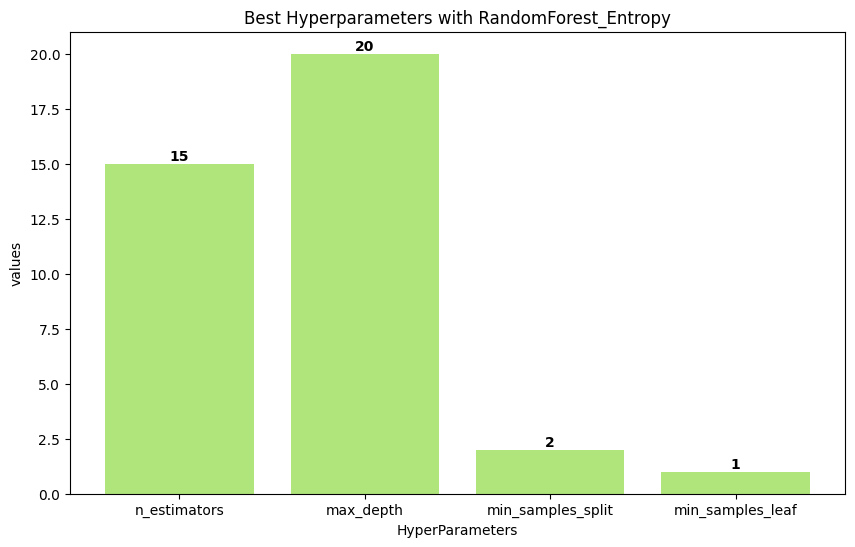

In [42]:
# Find the best params..
best_entropy_accuracy_params = max(rf_entropy_results['rf_entropy_accuracy'], key=rf_entropy_results['rf_entropy_accuracy'].get)

# Map hyperparameter names to values
best_entropy_hyperparameter_set = {
    'n_estimators': best_entropy_accuracy_params[0],
    'max_depth': best_entropy_accuracy_params[1],
    'min_samples_split': best_entropy_accuracy_params[2],
    'min_samples_leaf': best_entropy_accuracy_params[3]
}

# Retrieving  the corresponding metrics
rf_entropy_best_accuracy = rf_entropy_results['rf_entropy_accuracy'][best_entropy_accuracy_params]
rf_entropy_best_precision = rf_entropy_results['rf_entropy_precision'][best_entropy_accuracy_params]
rf_entropy_best_recall = rf_entropy_results['rf_entropy_recall'][best_entropy_accuracy_params]
rf_entropy_best_f1 = rf_entropy_results['rf_entropy_f1_score'][best_entropy_accuracy_params]


# Store the best results
performance_metrics['Random_Forest_Entropy'] = {
        "accuracy" : rf_entropy_best_accuracy,
        "precision" : rf_entropy_best_precision,
        "recall" : rf_entropy_best_recall,
        "f1-score" : rf_entropy_best_f1
    }

# Print the results
print("\nBest Hyperparameter Combination (Accuracy):", best_entropy_hyperparameter_set)

print("\nBest Accuracy:", rf_entropy_best_accuracy)
print("Best Precision:", rf_entropy_best_precision)
print("Best Recall:", rf_entropy_best_recall)
print("Best F1 Score:", rf_entropy_best_f1)

print("\n\n")

#Plotting the best hyperparams
figure, axes = mplt_g7.subplots(figsize=(10, 6)) #defining the size

rf_entropy_params_grid = list(best_entropy_hyperparameter_set.keys())
best_values = list(best_entropy_hyperparameter_set.values())

bars = axes.bar(rf_entropy_params_grid, best_values, color='#B0E57C')

# Display the best values on each bar
for bar, value in zip(bars, best_values):
    axes.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

axes.set_ylabel('values')
axes.set_xlabel('HyperParameters')
axes.set_title('Best Hyperparameters with RandomForest_Entropy')

mplt_g7.show()


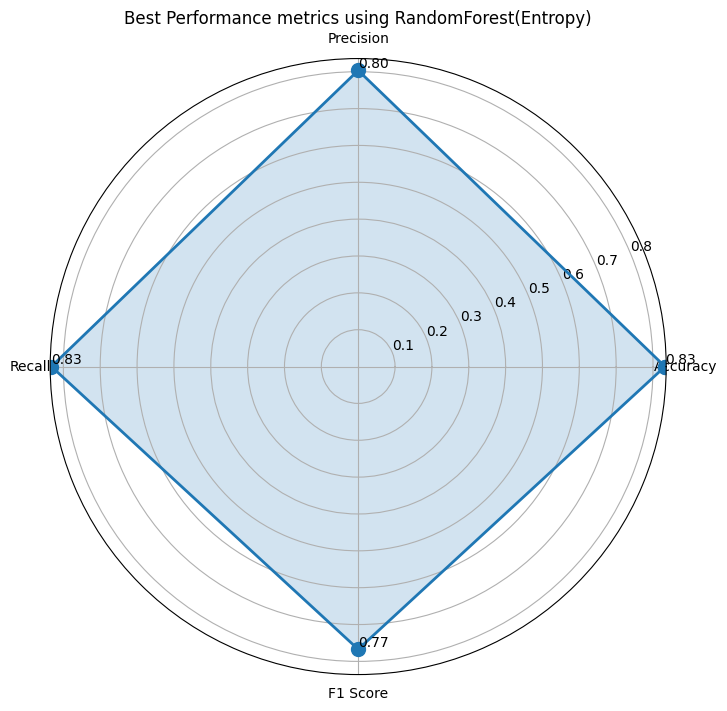

In [43]:
metrics_values = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_param_metrics = [rf_entropy_best_accuracy, rf_entropy_best_precision, rf_entropy_best_recall, rf_entropy_best_f1]

num_metrics = len(metrics_values)
angles = npy_g7.linspace(0, 2 * npy_g7.pi, num_metrics, endpoint=False).tolist()

# Close the plot
best_param_metrics += best_param_metrics[:1]
angles += angles[:1]

fig = mplt_g7.figure(figsize=(15, 8))
axes = fig.add_subplot(111, polar=True)

axes.plot(angles, best_param_metrics, marker='o', linestyle='-', linewidth=2, markersize=10)
axes.fill(angles, best_param_metrics, alpha=0.2)

# Add labels to the axes
axes.set_xticks(angles[:-1])
axes.set_xticklabels(metrics_values)

# Annotate each point with its value
for i, metric in enumerate(metrics_values):
    angle_rad = angles[i]
    value = best_param_metrics[i]
    axes.annotate(f'{value:.2f}', xy=(angle_rad, value), ha='left', va='bottom')

# Show the plot
mplt_g7.title('Best Performance metrics using RandomForest(Entropy)')
mplt_g7.show()


In [44]:
# cross validation..

X = imputed_news_cognizer_df.iloc[:, 1:]  # features
y = news_cognizer_data_frame['target_data']  # target_data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Random Forest
rf_entropy_param_grid = {
    'n_estimators': [5, 10, 15, 20, 25],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 7],
}


rf_entropy_classifier = RandomForestClassifier(criterion='entropy')
rf_grid_search_cv = GridSearchCV(rf_entropy_classifier, rf_entropy_param_grid, scoring='accuracy', cv=StratifiedKFold(n_splits=5))

rf_grid_search_cv.fit(X_train, y_train)

# Get the best parameters from the grid search
rf_entropy_best_params = rf_grid_search_cv.best_params_

# Get the best model from the grid search
best_rf_entropy_classifier = rf_grid_search_cv.best_estimator_

# Perform cross-validation and display the results
cross_val_accuracy = cross_val_score(best_rf_entropy_classifier, X, y, cv=5, scoring='accuracy')
cross_val_precision = cross_val_score(best_rf_entropy_classifier, X, y, cv=5, scoring='precision_weighted')
cross_val_recall = cross_val_score(best_rf_entropy_classifier, X, y, cv=5, scoring='recall_weighted')
cross_val_f1_score = cross_val_score(best_rf_entropy_classifier, X, y, cv=5, scoring='f1_weighted')

print("Best Parameters:", rf_entropy_best_params)

print("\nRandom Forest (Entropy) Grid Search Cross-Validation Results:")
print(f"Accuracy: {cross_val_accuracy.mean():.4f}")
print(f"Precision: {cross_val_precision.mean():.4f}")
print(f"Recall: {cross_val_recall.mean():.4f}")
print(f"F1 Score: {cross_val_f1_score.mean():.4f}")


/Users/dheerajchowdary/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dheerajchowdary/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dheerajchowdary/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dheerajchowdary

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}

Random Forest (Entropy) Grid Search Cross-Validation Results:
Accuracy: 0.8138
Precision: 0.7441
Recall: 0.8155
F1 Score: 0.7449


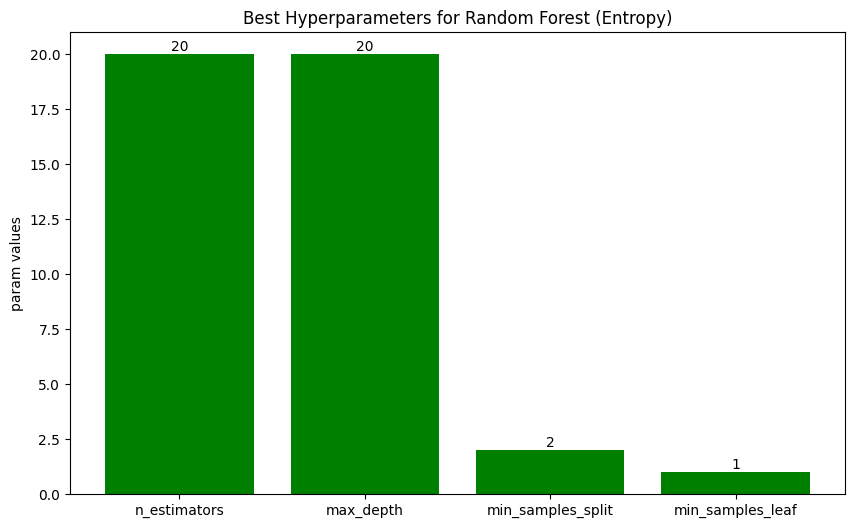

In [45]:
# Create a bar plot
figure, axes = mplt_g7.subplots(figsize=(10, 6))
bars = axes.bar(['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'],
              [rf_entropy_best_params['n_estimators'], rf_entropy_best_params['max_depth'], rf_entropy_best_params['min_samples_split'], rf_entropy_best_params['min_samples_leaf']],
              color=['#008000'])

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    mplt_g7.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

axes.set_title('Best Hyperparameters for Random Forest (Entropy)')
axes.set_ylabel('param values')

mplt_g7.show()


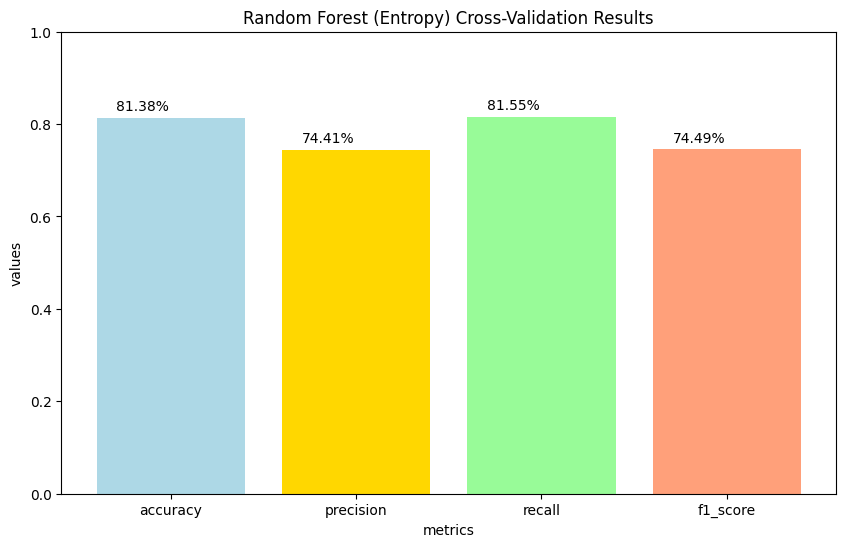

In [46]:

performance_metrics = ['accuracy', 'precision', 'recall', 'f1_score']
metrics_values = [cross_val_accuracy.mean(), cross_val_precision.mean(), cross_val_recall.mean(), cross_val_f1_score.mean()]

# Create a bar plot
fig, ax = mplt_g7.subplots(figsize=(10, 6))
bars = ax.bar(performance_metrics, metrics_values, color=['#ADD8E6', '#FFD700', '#98FB98', '#FFA07A'])

# Add labels and percentage values to each bar
for bar, value in zip(bars, metrics_values):
    ax.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{value:.2%}', ha='center', va='bottom', color='black', fontsize=10)

ax.set_title('Random Forest (Entropy) Cross-Validation Results')
ax.set_xlabel('metrics')
ax.set_ylabel('values')
ax.set_ylim(0, 1)
mplt_g7.show()


***SVM Implementation***

In [47]:
#svm model implemenatation

X = imputed_news_cognizer_df.iloc[:, 1:]  # features
y = news_cognizer_data_frame['target_data']  #target_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #split the data to train and test


svm_results = {
    'svm_accuracies': [],
    'svm_precisions': [],
    'svm_recalls': [],
    'svm_f1_scores': []
}
svm_accuracies = []
svm_precisions = []
svm_recalls = []
svm_f1_scores = []

#create param grid with different combinations
svm_hyperparameters_grid = [
    {'model': 'SVM_linear', "value":{'kernel': 'linear', 'C': 1.0}},
    {'model': 'SVM_Poly (degree=3)', "value":{'kernel': 'poly', 'degree': 3, 'C': 1.0}},
    {'model': 'SVM_RBF (gamma=scale)', "value":{'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}},
    {'model': 'SVM_Poly (degree=1)', "value":{'kernel': 'poly', 'degree': 1, 'C': 1.0}},
    {'model': 'SVM_Sigmoid', "value":{'kernel': 'sigmoid'}}
]

for svm_hyperparameters in svm_hyperparameters_grid:
    svm_hyperparameter_value = svm_hyperparameters['value']

    svm_clfr_instance = svc_classifier(**svm_hyperparameter_value)

    # Train the model
    svm_clfr_instance.fit(X_train, y_train)

    # test the model
    svm_y_pred_data = svm_clfr_instance.predict(X_test)

    # Calculate the performance metrics
    svm_accuracy = accuracy_g7(y_test, svm_y_pred_data)
    svm_precision = precision_g7(y_test, svm_y_pred_data, average='weighted', zero_division=1)
    svm_recall = recall_g7(y_test, svm_y_pred_data, average='weighted')
    svm_f1_score = f1_score_g7(y_test, svm_y_pred_data, average='weighted')

    svm_accuracies.append(svm_accuracy)
    svm_precisions.append(svm_precision)
    svm_recalls.append(svm_recall)
    svm_f1_scores.append(svm_f1_score)

    #print the performance with respect to hyperparameters
    print("\nHyperparameters" + str(svm_hyperparameters))
    print("Accuracy:", svm_accuracy)
    print("Precision:", svm_precision)
    print("Recall:", svm_recall)
    print("F1-score:", svm_f1_score)

svm_results['svm_accuracies'] = svm_accuracies
svm_results['svm_precisions'] = svm_precisions
svm_results['svm_recalls'] = svm_recalls
svm_results['svm_f1_scores'] = svm_f1_scores


Hyperparameters{'model': 'SVM_linear', 'value': {'kernel': 'linear', 'C': 1.0}}
Accuracy: 0.8163659793814433
Precision: 0.7680054421853474
Recall: 0.8163659793814433
F1-score: 0.7735551802451637

Hyperparameters{'model': 'SVM_Poly (degree=3)', 'value': {'kernel': 'poly', 'degree': 3, 'C': 1.0}}
Accuracy: 0.8234536082474226
Precision: 0.7993902028165218
Recall: 0.8234536082474226
F1-score: 0.7547195334900157

Hyperparameters{'model': 'SVM_RBF (gamma=scale)', 'value': {'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}}
Accuracy: 0.8260309278350515
Precision: 0.8563352178250748
Recall: 0.8260309278350515
F1-score: 0.7485833212602713

Hyperparameters{'model': 'SVM_Poly (degree=1)', 'value': {'kernel': 'poly', 'degree': 1, 'C': 1.0}}
Accuracy: 0.8260309278350515
Precision: 0.8119273549299155
Recall: 0.8260309278350515
F1-score: 0.7509745801307596

Hyperparameters{'model': 'SVM_Sigmoid', 'value': {'kernel': 'sigmoid'}}
Accuracy: 0.8144329896907216
Precision: 0.7941859993784708
Recall: 0.81443298

***SVM Visualization***

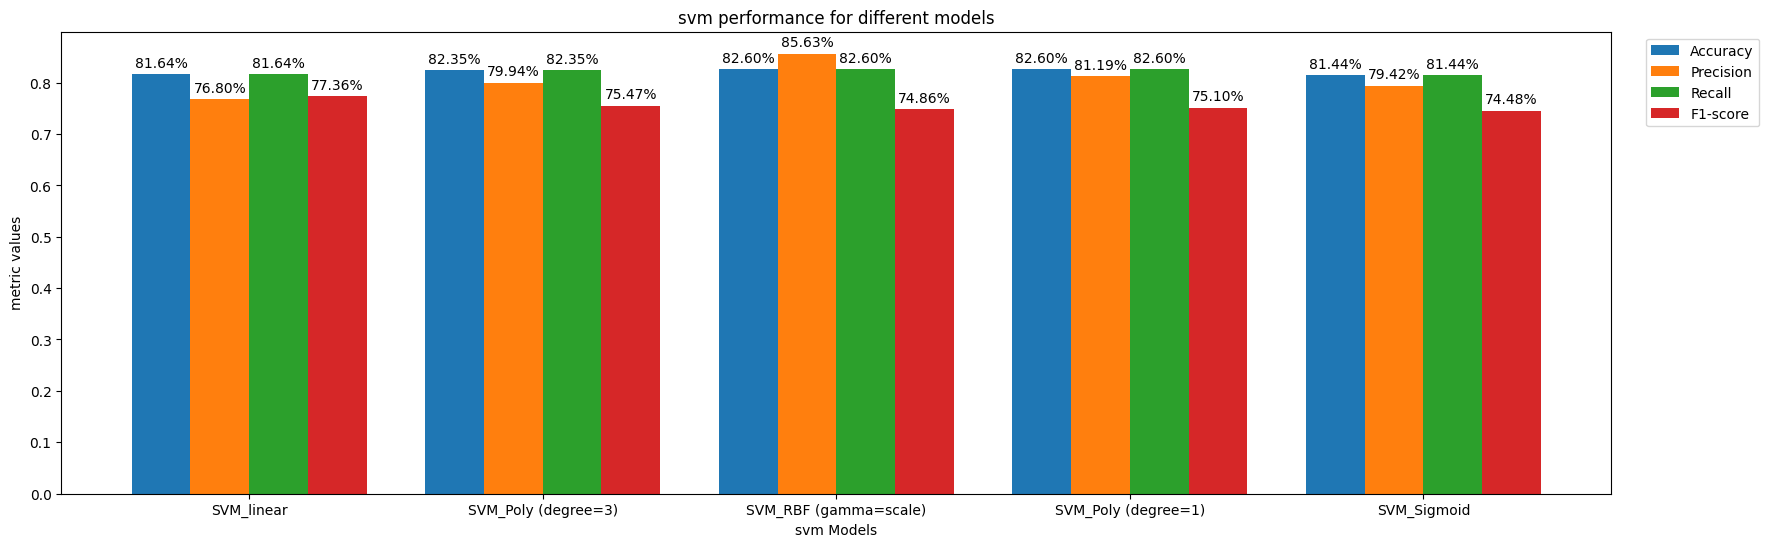

In [48]:
hyperparameter_names = [svm_hyperparameters['model'] for svm_hyperparameters in svm_hyperparameters_grid]

accuracy_values = svm_results['svm_accuracies']
precision_values = svm_results['svm_precisions']
recall_values = svm_results['svm_recalls']
f1_values = svm_results['svm_f1_scores']

# Set up positions for the bars
bar_width = 0.2
accuracy_bars = npy_g7.arange(len(hyperparameter_names))
precision_bars = [x + bar_width for x in accuracy_bars]
recall_bars = [x + bar_width for x in precision_bars]
f1_score_bars = [x + bar_width for x in recall_bars]

# Create a grouped bar chart
figure, axes = mplt_g7.subplots(figsize=(20, 6))  # Increase figure size

# Plot the metrics
axes.bar(accuracy_bars, accuracy_values, width=bar_width, label='Accuracy')
axes.bar(precision_bars, precision_values, width=bar_width, label='Precision')
axes.bar(recall_bars, recall_values, width=bar_width, label='Recall')
axes.bar(f1_score_bars, f1_values, width=bar_width, label='F1-score')

# Add labels and legend
axes.set_xlabel('svm Models')
axes.set_ylabel('metric values')
axes.set_title('svm performance for different models')

axes.set_xticks([r + bar_width * 1.5 for r in range(len(hyperparameter_names))])
axes.set_xticklabels(hyperparameter_names)
axes.legend(bbox_to_anchor=(1.1, 1), loc='upper right')

# adding value on each bar
def add_values_to_bars(bars):
    for bar in bars:
        height = bar.get_height()
        axes.annotate(f'{height:.2%}',  # Format as percentage
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values_to_bars(axes.patches)

mplt_g7.show()


In [49]:
# Assuming performance_metrics is a list, convert it to a dictionary
performance_metrics = {}

best_svm_model = None
best_svm_metrics = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1_score': 0}

for svm_hyperparameters, accuracy, precision, recall, f1_score in zip(svm_hyperparameters_grid, svm_accuracies, svm_precisions, svm_recalls, svm_f1_scores):
    model_name = svm_hyperparameters['model']

    # Update best model based on accuracy
    if accuracy > best_svm_metrics['accuracy']:
        best_svm_model = model_name
        best_svm_metrics['accuracy'] = accuracy
        best_svm_metrics['precision'] = precision
        best_svm_metrics['recall'] = recall
        best_svm_metrics['f1_score'] = f1_score

best_svm_metrics_int = {key: int(value) for key, value in best_svm_metrics.items()}

print("\nBest SVM Model:", best_svm_model)
print("Best Accuracy:", best_svm_metrics['accuracy'])
print("Best Precision:", best_svm_metrics['precision'])
print("Best Recall:", best_svm_metrics['recall'])
print("Best F1 Score:", best_svm_metrics['f1_score'])

# Use a string key to update the dictionary
performance_metrics['SVM'] = {
    "accuracy": best_svm_metrics_int['accuracy'],
    "precision": best_svm_metrics_int['precision'],
    "recall": best_svm_metrics_int['recall'],
    "f1-score": best_svm_metrics_int['f1_score']
}



Best SVM Model: SVM_RBF (gamma=scale)
Best Accuracy: 0.8260309278350515
Best Precision: 0.8563352178250748
Best Recall: 0.8260309278350515
Best F1 Score: 0.7485833212602713


In [51]:
#SVM Cross validation...

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC



X = imputed_news_cognizer_df.iloc[:, 1:]  # features
y = news_cognizer_data_frame['target_data']  #target_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the SVM model
svm_model = SVC()

# Define the hyperparameter grid
svm_hyperparameters_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1.0, 10.0]},
    {'kernel': ['poly'], 'degree': [3, 5], 'C': [0.1, 1.0, 10.0]},
    {'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 'C': [0.1, 1.0, 10.0]},
    {'kernel': ['sigmoid'], 'C': [0.1, 1.0, 10.0]}
]

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, svm_hyperparameters_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)



Best Hyperparameters:
{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}


***Naive Bayes using Gaussian***

Performance Metrics with Gaussian Naive Bayes:
Accuracy: 0.52
Precision: 0.72
Recall: 0.52
F1 Score: 0.59
Confusion Matrix:

[[  8  23   7   3   5   1   1]
 [ 75 740 233  49 109  61  13]
 [  4  44  29   0   6   2   1]
 [  3  14   4   3   2   1   0]
 [  1  17   5   0  12   2   0]
 [  2  22  10   3   0   2   0]
 [  0  17   5   1   1   0  11]]





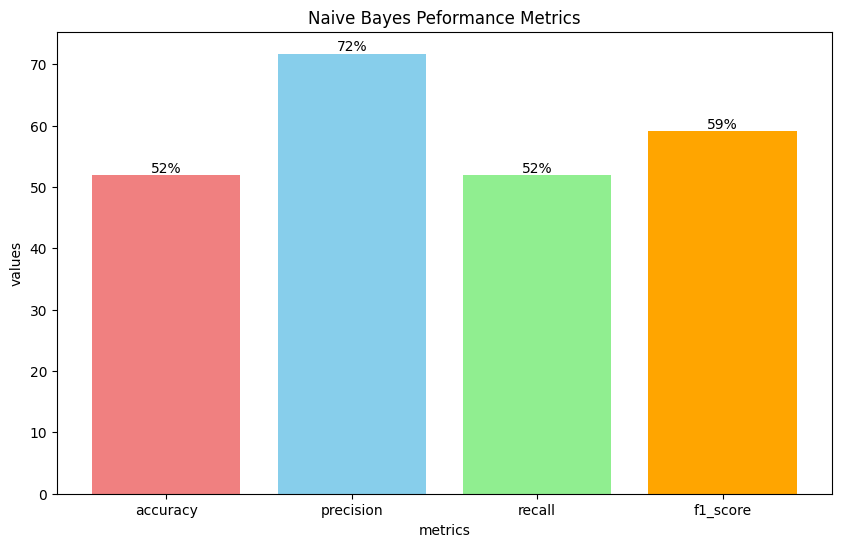

In [56]:
X = imputed_news_cognizer_df.iloc[:, 1:]  # features
y = news_cognizer_data_frame['target_data']  #target_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_gaussian_instance = GaussianNB()
nb_gaussian_instance.fit(X_train, y_train)
nb_gaussian_y_pred = nb_gaussian_instance.predict(X_test)

# Calculate and print performance metrics
accuracy = accuracy_g7(y_test, nb_gaussian_y_pred)
precision = precision_g7(y_test, nb_gaussian_y_pred, average='weighted')
recall = recall_g7(y_test, nb_gaussian_y_pred, average='weighted')
f1 = f1_score_g7(y_test, nb_gaussian_y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, nb_gaussian_y_pred)

print("Performance Metrics with Gaussian Naive Bayes:")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("Confusion Matrix:\n")
print(conf_matrix)

print("\n\n")

performance_metrics['NaiveBayes_Gaussian'] = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1-score": f1
}

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
performance_metric_values = [accuracy*100, precision*100, recall*100, f1*100]

custom_colors = ['lightcoral', 'skyblue', 'lightgreen', 'orange']
mplt_g7.figure(figsize=(10, 6))
bars = mplt_g7.bar(metrics_to_plot, performance_metric_values, color=custom_colors)

# Add percentages on each bar
for bar in bars:
    mplt_g7.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}%', ha='center', va='bottom', color='black')

# Set labels and title
mplt_g7.xlabel('metrics')
mplt_g7.ylabel('values')
mplt_g7.title('Naive Bayes Peformance Metrics')
mplt_g7.show()

In [57]:
#naive bayes gaussian cross validation...

param_grid = {}
nd_gaussian_grid_search_cv = GridSearchCV(nb_gaussian_instance, param_grid, cv=5, scoring='accuracy')
nd_gaussian_grid_search_cv.fit(X, y)

nb_gaussain_best_params = nd_gaussian_grid_search_cv.best_params_
print("Best Hyperparameters for naive bayes gaussain::")
print(nb_gaussain_best_params)

#scoring params to cross validate
scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
nb_gaussain_cv_results = cross_validate(nd_gaussian_grid_search_cv.best_estimator_, X, y, cv=5, scoring=scoring_metrics, return_train_score=False, error_score=npy_g7.nan)

# Display the cross-validation results
for metric in scoring_metrics:
    print(f"{metric.capitalize()}: {nb_gaussain_cv_results['test_' + metric].mean()}")


Best Hyperparameters for naive bayes gaussain::
{}
Accuracy: 0.47855016398957195
Precision_weighted: 0.7072899601136751
Recall_weighted: 0.47855016398957195
F1_weighted: 0.5580786916781876


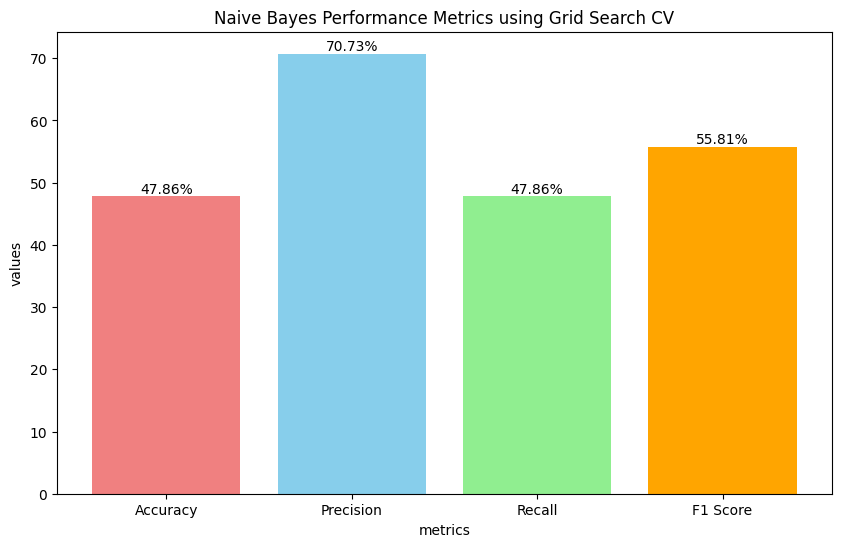

In [58]:
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
performance_metric_values = [nb_gaussain_cv_results['test_accuracy'].mean()*100,
                              nb_gaussain_cv_results['test_precision_weighted'].mean()*100,
                              nb_gaussain_cv_results['test_recall_weighted'].mean()*100,
                              nb_gaussain_cv_results['test_f1_weighted'].mean()*100]


custom_colors = ['lightcoral', 'skyblue', 'lightgreen', 'orange']
mplt_g7.figure(figsize=(10, 6))
metric_bars = mplt_g7.bar(metrics_to_plot, performance_metric_values, color=custom_colors)

#adding values to bars
for bar in metric_bars:
    mplt_g7.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}%', ha='center', va='bottom', color='black')

mplt_g7.xlabel('metrics')
mplt_g7.ylabel('values')
mplt_g7.title('Naive Bayes Performance Metrics using Grid Search CV')

# Show the plot
mplt_g7.show()

***Naive Bayes Multinomial***

Performance Metrics with Multinomial Naive Bayes:
Accuracy: 0.80
Precision: 0.75
Recall: 0.80
F1 Score: 0.75

Confusion Matrix:
[[  8  23   7   3   5   1   1]
 [ 75 740 233  49 109  61  13]
 [  4  44  29   0   6   2   1]
 [  3  14   4   3   2   1   0]
 [  1  17   5   0  12   2   0]
 [  2  22  10   3   0   2   0]
 [  0  17   5   1   1   0  11]]





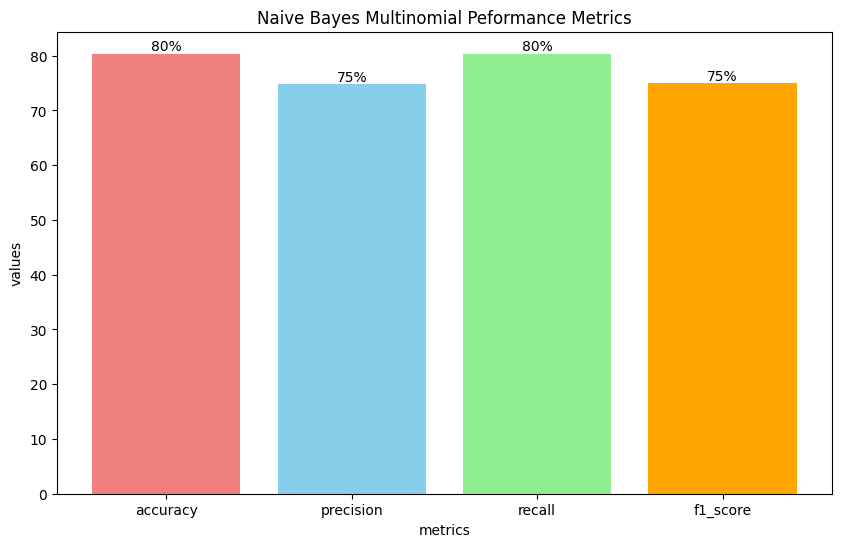

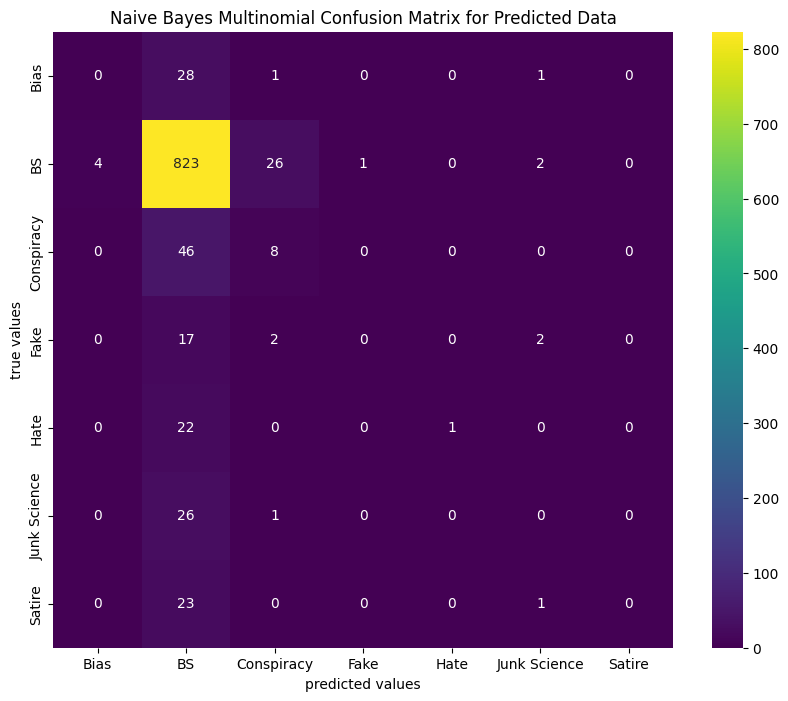

In [60]:
#naive bayes implementation using multinomial

X = imputed_news_cognizer_df.iloc[:, 1:]  # features
y = news_cognizer_data_frame['target_data']  #target_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create naive bayes multinomial instance and train the model
nb_multinomial_instance = MultinomialNB()

param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Adjust the values based on your needs
    'fit_prior': [True, False]
}

nb_multinomial_instance.fit(X_train, y_train)
nb_multinomial_y_pred = nb_multinomial_instance.predict(X_test)

# Calculate and display performance metrics
nb_multinomial_accuracy = accuracy_g7(y_test, nb_multinomial_y_pred)
nb_multinomial_precision = precision_g7(y_test, nb_multinomial_y_pred, average='weighted',zero_division=1)
nb_multinomial_recall = recall_g7(y_test, nb_multinomial_y_pred, average='weighted')
nb_multinomial_f1_score = f1_score_g7(y_test, nb_multinomial_y_pred, average='weighted')

nb_multinomial_conf_matrix = confusion_matrix(y_test, nb_multinomial_y_pred)

print("Performance Metrics with Multinomial Naive Bayes:")

print(f"Accuracy: {nb_multinomial_accuracy:.2f}")
print(f"Precision: {nb_multinomial_precision:.2f}")
print(f"Recall: {nb_multinomial_recall:.2f}")
print(f"F1 Score: {nb_multinomial_f1_score:.2f}")

print("\nConfusion Matrix:")
print(conf_matrix)

#store the metric values
performance_metrics['NaiveBayes_Multinomial'] = {
    "accuracy": nb_multinomial_accuracy,
    "precision": nb_multinomial_precision,
    "recall": nb_multinomial_recall,
    "f1-score": nb_multinomial_f1_score
}

print("\n\n")

#visualize the performance metrics
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
performance_metric_values = [nb_multinomial_accuracy*100, nb_multinomial_precision*100, nb_multinomial_recall*100, nb_multinomial_f1_score*100]

custom_colors = ['lightcoral', 'skyblue', 'lightgreen', 'orange']
mplt_g7.figure(figsize=(10, 6))
bars = mplt_g7.bar(metrics_to_plot, performance_metric_values, color=custom_colors)

# Add percentages on each bar
for bar in bars:
    mplt_g7.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}%', ha='center', va='bottom', color='black')

# Set labels and title
mplt_g7.xlabel('metrics')
mplt_g7.ylabel('values')
mplt_g7.title('Naive Bayes Multinomial Peformance Metrics')
mplt_g7.show()

print("\n\n")

nb_multinomial_conf_matrix = confusion_matrix(y_test, nb_multinomial_y_pred)
mplt_g7.figure(figsize=(10, 8))
sns_g7.heatmap(nb_multinomial_conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=[news_categories_mapping[i] for i in range(7)],
            yticklabels=[news_categories_mapping[i] for i in range(7)])
mplt_g7.xlabel('predicted values')
mplt_g7.ylabel('true values')
mplt_g7.title('Naive Bayes Multinomial Confusion Matrix for Predicted Data')
mplt_g7.show()


In [61]:
#naive bayes mulltinomial cross validation..

#create the para grid to implemnt the naive bayes using multinomial
nb_multinomial_param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}

performance_scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# custom scoring function to handle zero division
def custom_scorer(y_true, y_pred):
    return 0 if npy_g7.sum(y_pred) == 0 else accuracy_g7(y_true, y_pred, sample_weight='weighted')

# Perform grid search with cross-validation
stratifiedKFold_instance = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

multinomial_grid_search_cv = GridSearchCV(nb_multinomial_instance, nb_multinomial_param_grid, cv=stratifiedKFold_instance, scoring=make_scorer_g7(custom_scorer, zero_division=1), error_score=npy_g7.nan)
multinomial_grid_search_cv.fit(X, y)

# Display the best hyperparameters
nb_multinomial_cv_best_params = multinomial_grid_search_cv.best_params_

# Perform cross-validation with the best hyperparameters
multinomial_cv_results = cross_validate(multinomial_grid_search_cv.best_estimator_, X, y, cv=stratifiedKFold_instance, scoring=performance_scoring_metrics, return_train_score=False, error_score=npy_g7.nan)

print("\nBest Hyperparameters for Multinomial Naive Bayes:")
print(nb_multinomial_cv_best_params)

print("\n")

# Display the cross-validation results
for metric in performance_scoring_metrics:
    print(f"{metric.capitalize()}: {multinomial_cv_results['test_' + metric].mean()}")

/Users/dheerajchowdary/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dheerajchowdary/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dheerajchowdary/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/dheerajchowdary/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
TypeError: custom_scorer() got an unexpected keyword argument 'zero_division'

  warnings.warn(
/Users/dheerajchowdary/Library/Python/3.9/lib/


Best Hyperparameters for Multinomial Naive Bayes:
{'alpha': 0.1, 'fit_prior': True}


Accuracy: 0.7741670170717349
Precision_weighted: 0.7243146244951049
Recall_weighted: 0.7741670170717349
F1_weighted: 0.7447832737064122


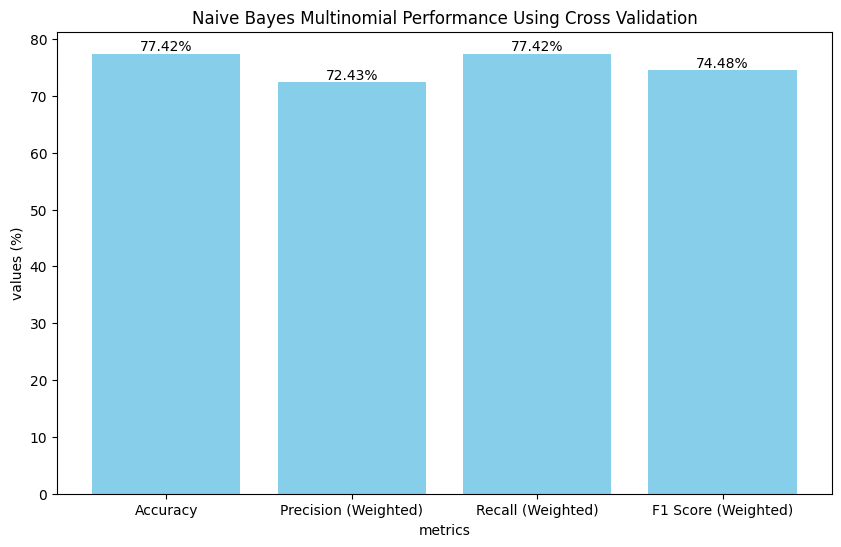

In [62]:
# Visualize the results
metrics_to_plot = ['Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1 Score (Weighted)']
performance_metric_values = [multinomial_cv_results['test_accuracy'].mean()*100,
                              multinomial_cv_results['test_precision_weighted'].mean()*100,
                              multinomial_cv_results['test_recall_weighted'].mean()*100,
                              multinomial_cv_results['test_f1_weighted'].mean()*100]

mplt_g7.figure(figsize=(10, 6))
metric_bars = mplt_g7.bar(metrics_to_plot, performance_metric_values, color='skyblue')

# Add values at the center of each bar
for metric_bar in metric_bars:
    mplt_g7.text(metric_bar.get_x() + metric_bar.get_width() / 2, metric_bar.get_height(),
             f'{metric_bar.get_height():.2f}%', ha='center', va='bottom', color='black')

# Set labels and title
mplt_g7.xlabel('metrics')
mplt_g7.ylabel('values (%)')
mplt_g7.title('Naive Bayes Multinomial Performance Using Cross Validation')

# Show the plot
mplt_g7.show()

***Gradient Boosting***

In [63]:
#gradient boosting implementation

X = imputed_news_cognizer_df.iloc[:, 1:]  # features
y = news_cognizer_data_frame['target_data']  #target_data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split the data to train and test

gradient_boosting_results = {
    'gradient_boosting_accuracy': {},
    'gradient_boosting_precision': {},
    'gradient_boosting_recall': {},
    'gradient_boosting_f1_score': {}
}

# Specify the parameter grid
param_grid = {
    'n_estimators': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# loop over each combination of hyperparameters
for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:

            # Create and train the Gradient Boosting Classifier with the current hyperparameters
            gradient_boosting_instance = GradientBoostingClassifier(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            gradient_boosting_instance.fit(X_train, y_train)

            gradient_boosting_y_pred = gradient_boosting_instance.predict(X_test)

            # Compute evaluation metrics
            gradient_boosting_accuracy = accuracy_g7(y_test, gradient_boosting_y_pred)
            gradient_boosting_precision = precision_g7(y_test, gradient_boosting_y_pred, average='weighted', zero_division=1)
            gradient_boosting_recall = recall_g7(y_test, gradient_boosting_y_pred, average='weighted',zero_division=1)
            gradient_boosting_f1_score = f1_score_g7(y_test, gradient_boosting_y_pred, average='weighted',zero_division=1)

            # Displaying the hyperparams and respective performance metrics
            print(f"\nParams: {{'n_estimators': {n_estimators}, 'max_depth': {max_depth}, 'learning_rate': {learning_rate}}}")
            print(f"Accuracy: {gradient_boosting_accuracy:.4f}")
            print(f"Precision: {gradient_boosting_precision:.4f}")
            print(f"Recall: {gradient_boosting_recall:.4f}")
            print(f"F1 Score: {gradient_boosting_f1_score:.4f}")

            # Store results in the dictionary
            gradient_boosting_results['gradient_boosting_accuracy'][(n_estimators, max_depth, learning_rate)] = gradient_boosting_accuracy
            gradient_boosting_results['gradient_boosting_precision'][(n_estimators, max_depth, learning_rate)] = gradient_boosting_precision
            gradient_boosting_results['gradient_boosting_recall'][(n_estimators, max_depth, learning_rate)] = gradient_boosting_recall
            gradient_boosting_results['gradient_boosting_f1_score'][(n_estimators, max_depth, learning_rate)] = gradient_boosting_f1_score



Params: {'n_estimators': 5, 'max_depth': 3, 'learning_rate': 0.01}
Accuracy: 0.8271
Precision: 0.8570
Recall: 0.8271
F1 Score: 0.7488

Params: {'n_estimators': 5, 'max_depth': 5, 'learning_rate': 0.01}
Accuracy: 0.8271
Precision: 0.8570
Recall: 0.8271
F1 Score: 0.7488

Params: {'n_estimators': 5, 'max_depth': 7, 'learning_rate': 0.01}
Accuracy: 0.8271
Precision: 0.8570
Recall: 0.8271
F1 Score: 0.7488

Params: {'n_estimators': 5, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy: 0.8696
Precision: 0.8571
Recall: 0.8696
F1 Score: 0.8567

Params: {'n_estimators': 5, 'max_depth': 5, 'learning_rate': 0.1}
Accuracy: 0.8715
Precision: 0.8467
Recall: 0.8715
F1 Score: 0.8633

Params: {'n_estimators': 5, 'max_depth': 7, 'learning_rate': 0.1}
Accuracy: 0.8802
Precision: 0.8763
Recall: 0.8802
F1 Score: 0.8654

Params: {'n_estimators': 5, 'max_depth': 3, 'learning_rate': 0.2}
Accuracy: 0.8580
Precision: 0.8286
Recall: 0.8580
F1 Score: 0.8503

Params: {'n_estimators': 5, 'max_depth': 5, 'learning_rate


Best Hyperparameters based on Accuracy:
Params: {'n_estimators': 15, 'max_depth': 7, 'learning_rate': 0.1}
Accuracy: 0.8957
Precision: 0.8895
Recall: 0.8957
F1 Score: 0.8840





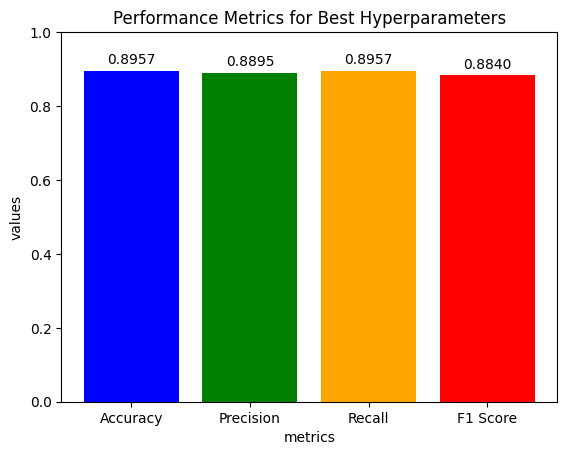

In [67]:
# Find the best hyperparameters based on accuracy
best_accuracy_params = max(gradient_boosting_results['gradient_boosting_accuracy'], key=gradient_boosting_results['gradient_boosting_accuracy'].get)

# Display the best hyperparameters and their performance metrics
print("\nBest Hyperparameters based on Accuracy:")
print(f"Params: {{'n_estimators': {best_accuracy_params[0]}, 'max_depth': {best_accuracy_params[1]}, 'learning_rate': {best_accuracy_params[2]}}}")
print(f"Accuracy: {gradient_boosting_results['gradient_boosting_accuracy'][best_accuracy_params]:.4f}")
print(f"Precision: {gradient_boosting_results['gradient_boosting_precision'][best_accuracy_params]:.4f}")
print(f"Recall: {gradient_boosting_results['gradient_boosting_recall'][best_accuracy_params]:.4f}")
print(f"F1 Score: {gradient_boosting_results['gradient_boosting_f1_score'][best_accuracy_params]:.4f}")

#storing the metrics

performance_metrics['Gradient_Boosting'] = {
    "accuracy": gradient_boosting_results['gradient_boosting_accuracy'][best_accuracy_params],
    "precision": gradient_boosting_results['gradient_boosting_precision'][best_accuracy_params],
    "recall": gradient_boosting_results['gradient_boosting_precision'][best_accuracy_params],
    "f1-score": gradient_boosting_results['gradient_boosting_f1_score'][best_accuracy_params]
}

print("\n\n")

# Creating a bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [gradient_boosting_results['gradient_boosting_accuracy'][best_accuracy_params],
          gradient_boosting_results['gradient_boosting_precision'][best_accuracy_params],
          gradient_boosting_results['gradient_boosting_recall'][best_accuracy_params],
          gradient_boosting_results['gradient_boosting_f1_score'][best_accuracy_params]]

mplt_g7.bar(metrics, values, color=['blue', 'green', 'orange', 'red']) #defining bar colors

#set title, X-label, Y-label
mplt_g7.xlabel('metrics')
mplt_g7.ylabel('values')
mplt_g7.title('Performance Metrics for Best Hyperparameters')

mplt_g7.ylim(0, 1) #y-axis range
for i, value in enumerate(values):
    mplt_g7.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

mplt_g7.show()


In [69]:
#gradient boosting cross validation...

X = imputed_news_cognizer_df.iloc[:, 1:]  # features
y = news_cognizer_data_frame['target_data']  #target_data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(gb_classifier, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Perform grid search
grid_search.fit(X, y)

# Print the best hyperparameters and their corresponding performance
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-validated Accuracy: {:.2f}".format(grid_search.best_score_))


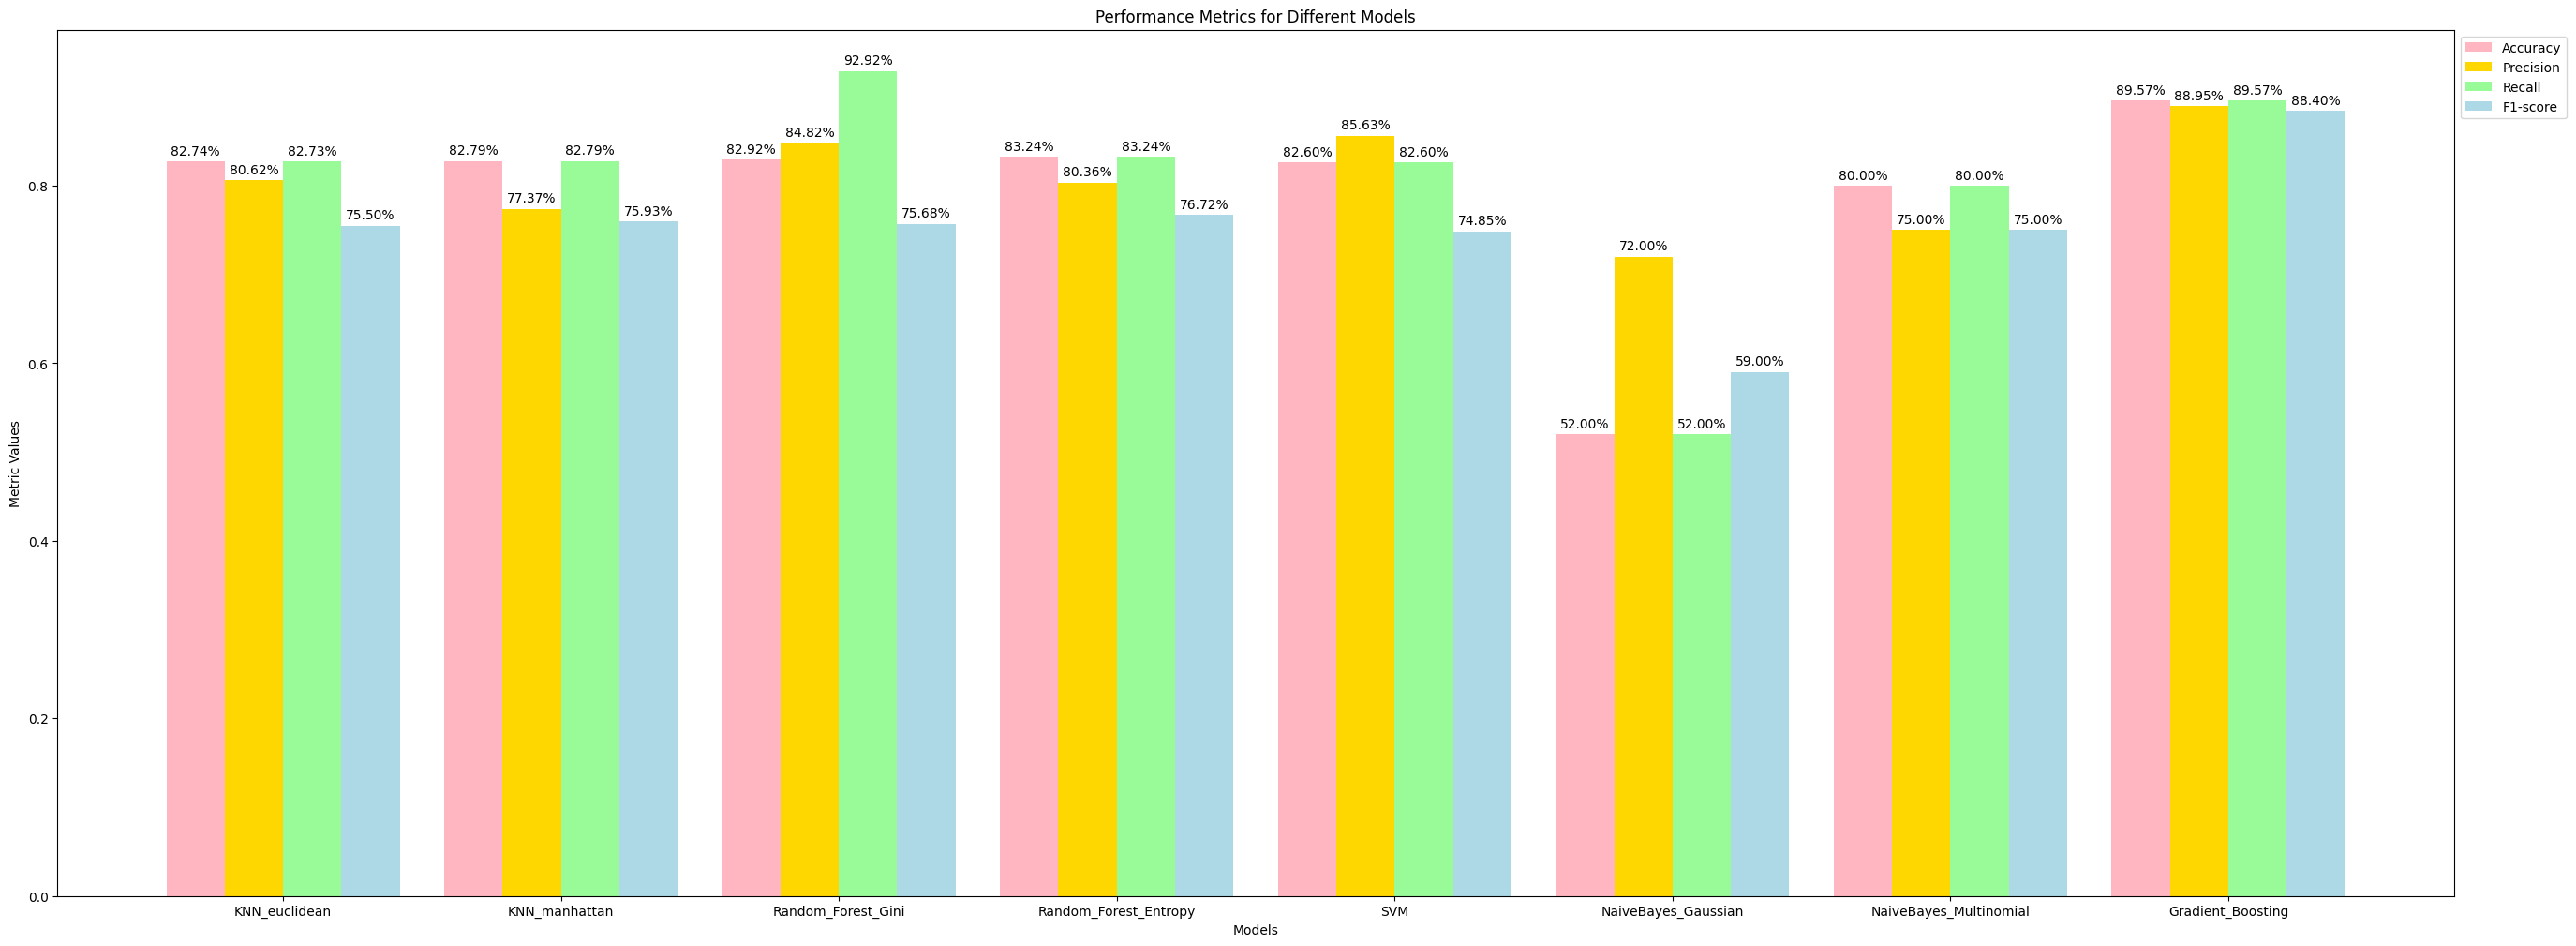

In [72]:
#comparisions of different models

selected_models = ["KNN_euclidean", "KNN_manhattan", "Random_Forest_Gini","Random_Forest_Entropy", "SVM", "NaiveBayes_Gaussian", "NaiveBayes_Multinomial", "Gradient_Boosting"]

# fetch the netrics of each model
accuracy_values = [performance_metrics[key]['accuracy'] for key in selected_models]
precision_values = [performance_metrics[key]['precision'] for key in selected_models]
recall_values = [performance_metrics[key]['recall'] for key in selected_models]
f1_score_values = [performance_metrics[key]['f1-score'] for key in selected_models]

# Setting up bar positions
bar_width = 0.21
model_index = npy_g7.arange(len(selected_models))

# Plotting grouped bar charts
mplt_g7.figure(figsize=(33, 12))

pastel_colors = ['#FFB6C1', '#FFD700', '#98FB98', '#ADD8E6']

accuracy_bar = mplt_g7.bar(model_index, accuracy_values, bar_width, label='Accuracy',color=pastel_colors[0])
precision_bar = mplt_g7.bar(model_index + bar_width, precision_values, bar_width, label='Precision',color=pastel_colors[1])
recall_bar = mplt_g7.bar(model_index + 2 * bar_width, recall_values, bar_width, label='Recall',color=pastel_colors[2])
f1_score_bar = mplt_g7.bar(model_index + 3 * bar_width, f1_score_values, bar_width, label='F1-score',color=pastel_colors[3])


# Adding labels and title to the bar chart
mplt_g7.xlabel('Models')
mplt_g7.ylabel('Metric Values')
mplt_g7.title('Performance Metrics for Different Models')

mplt_g7.xticks(model_index + 1.5 * bar_width, selected_models)
mplt_g7.legend(loc='upper left', bbox_to_anchor=(1, 1))

# adding value to each bar
def adding_value_to_bar(bars):
    for bar in bars:
        height = bar.get_height()
        mplt_g7.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

adding_value_to_bar(accuracy_bar)
adding_value_to_bar(precision_bar)
adding_value_to_bar(recall_bar)
adding_value_to_bar(f1_score_bar)

mplt_g7.show()


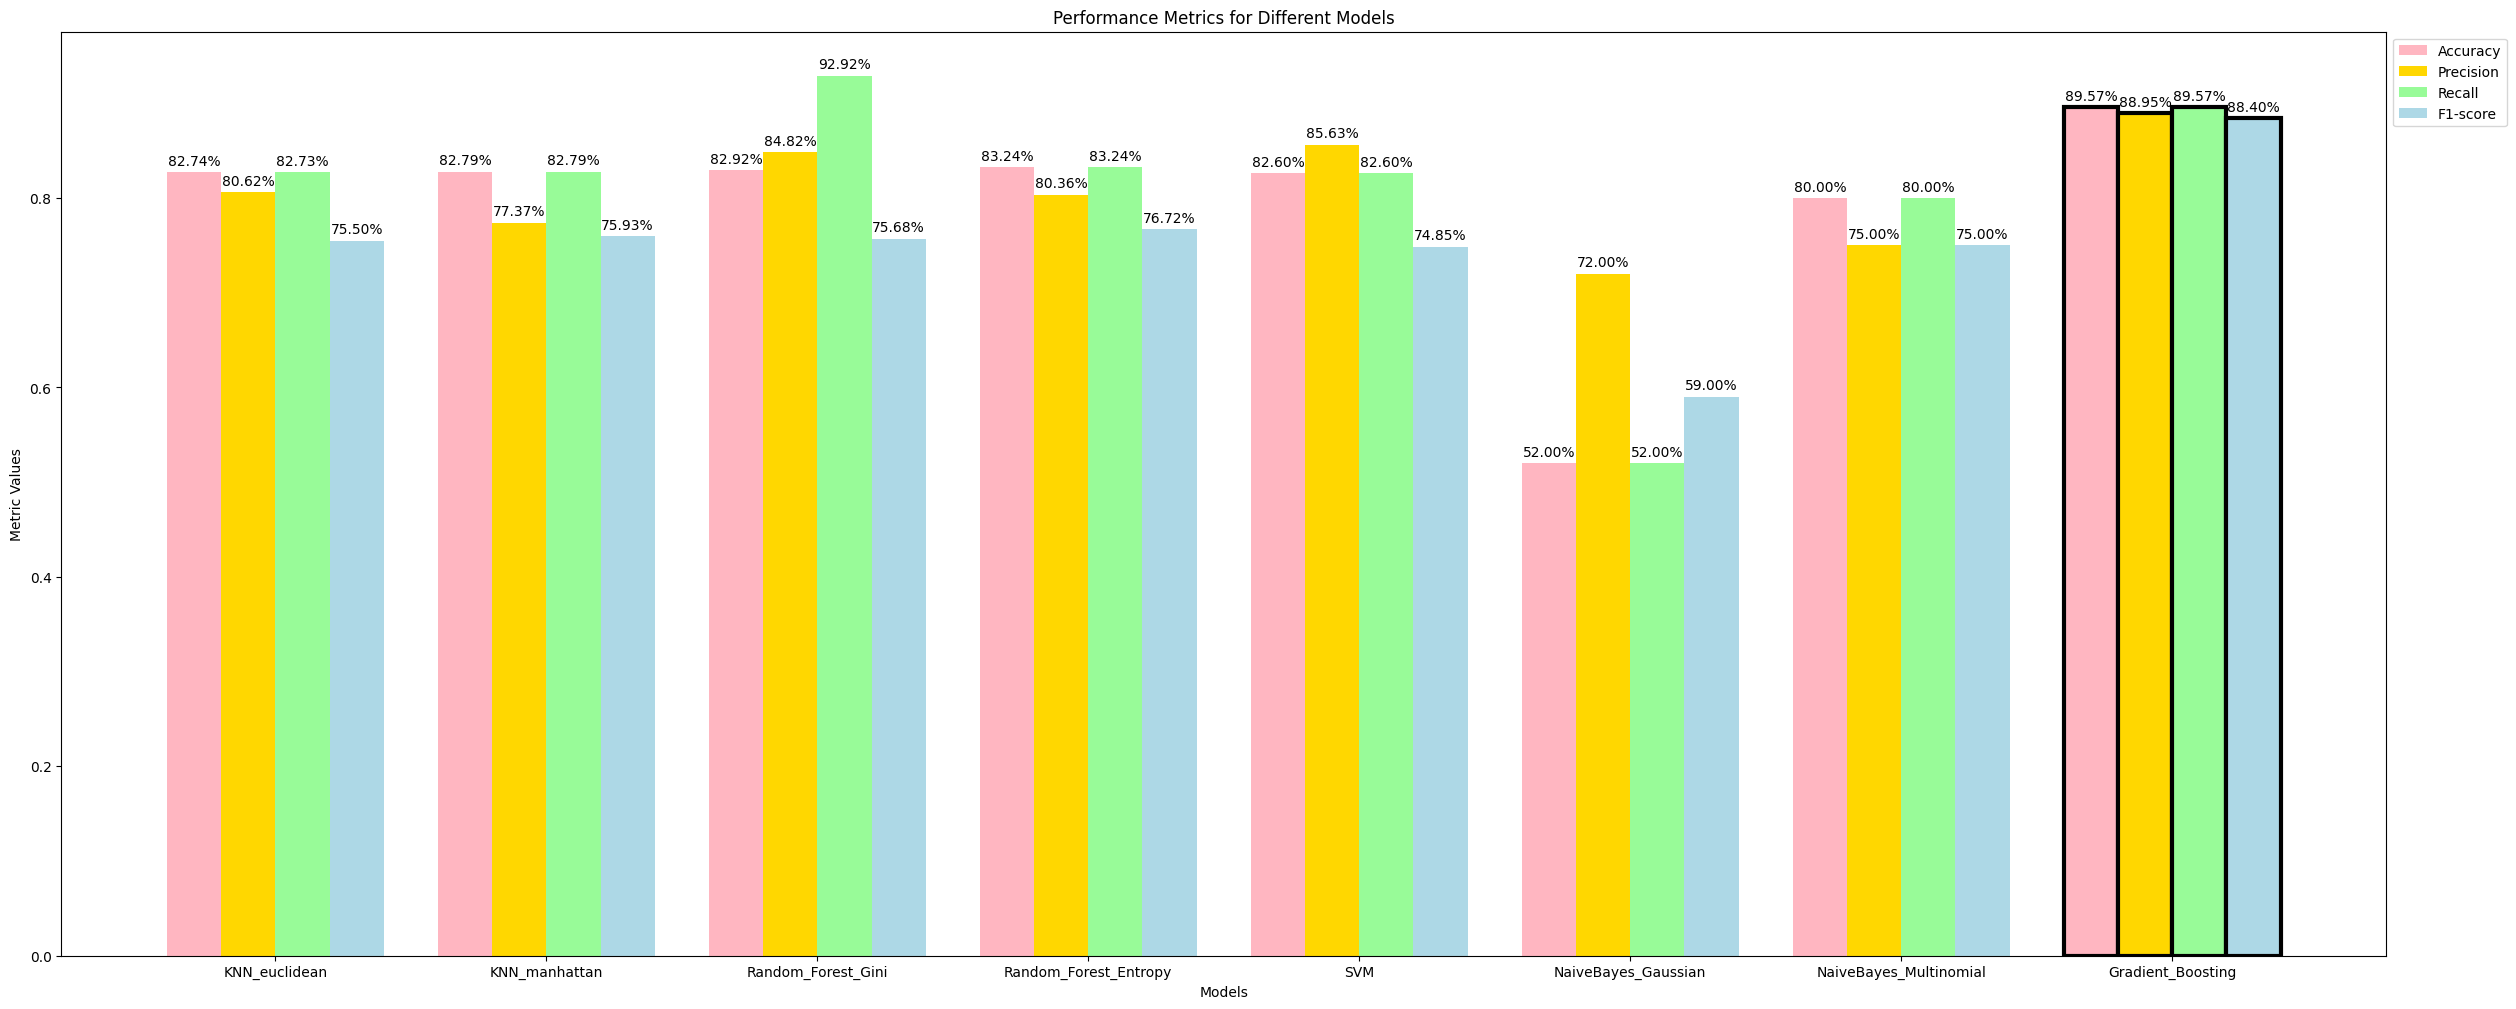

In [74]:

selected_models = ["KNN_euclidean", "KNN_manhattan", "Random_Forest_Gini", "Random_Forest_Entropy", "SVM", "NaiveBayes_Gaussian", "NaiveBayes_Multinomial", "Gradient_Boosting"]

# Fetch the metrics of each model
accuracy_values = [performance_metrics[key]['accuracy'] for key in selected_models]
precision_values = [performance_metrics[key]['precision'] for key in selected_models]
recall_values = [performance_metrics[key]['recall'] for key in selected_models]
f1_score_values = [performance_metrics[key]['f1-score'] for key in selected_models]

# Setting up bar positions
bar_width = 0.2
model_index = npy_g7.arange(len(selected_models))

# Plotting grouped bar charts
mplt_g7.figure(figsize=(30, 12))

border_size = 3  # Specify the desired border size

pastel_colors = ['#FFB6C1', '#FFD700', '#98FB98', '#ADD8E6']

accuracy_bar = mplt_g7.bar(model_index, accuracy_values, bar_width, label='Accuracy', edgecolor=['black' if model == 'Gradient_Boosting' else 'none' for model in selected_models], linewidth=border_size, color=pastel_colors[0])
precision_bar = mplt_g7.bar(model_index + bar_width, precision_values, bar_width, label='Precision', edgecolor=['black' if model == 'Gradient_Boosting' else 'none' for model in selected_models], linewidth=border_size,color=pastel_colors[1])
recall_bar = mplt_g7.bar(model_index + 2 * bar_width, recall_values, bar_width, label='Recall', edgecolor=['black' if model == 'Gradient_Boosting' else 'none' for model in selected_models], linewidth=border_size, color=pastel_colors[2])
f1_score_bar = mplt_g7.bar(model_index + 3 * bar_width, f1_score_values, bar_width, label='F1-score', edgecolor=['black' if model == 'Gradient_Boosting' else 'none' for model in selected_models], linewidth=border_size,color=pastel_colors[3])

# Adding labels and title to the bar chart
mplt_g7.xlabel('Models')
mplt_g7.ylabel('Metric Values')
mplt_g7.title('Performance Metrics for Different Models')

mplt_g7.xticks(model_index + 1.5 * bar_width, selected_models)
mplt_g7.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding value to each bar
def adding_value_to_bar(bars):
    for bar in bars:
        height = bar.get_height()
        mplt_g7.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

adding_value_to_bar(accuracy_bar)
adding_value_to_bar(precision_bar)
adding_value_to_bar(recall_bar)
adding_value_to_bar(f1_score_bar)

mplt_g7.show()
